<a href="https://colab.research.google.com/github/ding-ma/dodgebot/blob/master/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Gathering Data (Obsolete)**

In [ ]:
# import statements
import requests
import numpy as np
import time
from datetime import datetime

In [ ]:
# update api key every time
api_key = "RGAPI-339f99a1-9c0c-4b59-a150-e18ed0911a65"
path = "https://na1.api.riotgames.com/lol/match/v4/matches/"

In [ ]:
# list of match IDs found on Riot API
Oct5MatchIds = [3601310900, 3601310911, 3601310919, 3601310927, 3601310944, 3601310957, 3601310958, 3601310972, 3601310973, 3601310974, 3601311002, 3601311079, 3601311085, 3601311117, 3601311135, 3601311167, 3601311199, 3601311209, 3601311256, 3601311261, 3601311277, 3601311294, 3601311295, 3601311302, 3601311338, 3601311339, 3601311340, 3601311342, 3601311344, 3601311345, 3601311370, 3601311386, 3601311387, 3601311390, 3601311397, 3601311398, 3601311415, 3601311425, 3601311453, 3601311466, 3601311490, 3601311519, 3601311523, 3601311552, 3601311570, 3601311596, 3601311626, 3601311634, 3601311646, 3601311649, 3601311653, 3601311663, 3601311667, 3601311686, 3601311693, 3601311704, 3601311710, 3601311726, 3601311736, 3601311737, 3601311780, 3601311783, 3601311817, 3601311832, 3601311840, 3601311849, 3601311860, 3601311867, 3601311868, 3601311876, 3601311909, 3601311910, 3601311911, 3601311935, 3601311950, 3601311955, 3601311965, 3601311969, 3601311991, 3601311995, 3601311998, 3601312001, 3601312017, 3601312020, 3601312026, 3601312057, 3601312066, 3601312094, 3601312095, 3601312096, 3601312130, 3601312140, 3601312141, 3601312154, 3601312202, 3601312213, 3601312234, 3601312235, 3601312248, 3601312249, 3601312288, 3601312304, 3601312306, 3601312308, 3601312314, 3601312317, 3601312322, 3601312323, 3601312347, 3601312386, 3601312430, 3601312434, 3601312445, 3601312469, 3601312470, 3601312475, 3601312491, 3601312498, 3601312502, 3601312505, 3601312530, 3601312555, 3601312560, 3601312563, 3601312577, 3601312599, 3601312637, 3601312644, 3601312645, 3601312652, 3601312657, 3601312658, 3601312667, 3601312682, 3601312684, 3601312688, 3601312706, 3601312715, 3601312719, 3601312722, 3601312740, 3601312745, 3601312763, 3601312770, 3601312804, 3601312808, 3601312812, 3601312828, 3601312834, 3601312865, 3601312915, 3601312923, 3601312926, 3601312931, 3601312935, 3601312941, 3601312946, 3601312950, 3601312956, 3601312972, 3601312989, 3601313002, 3601313003, 3601313015, 3601313020, 3601313029, 3601313035, 3601313039, 3601313040, 3601313051, 3601313052, 3601313056, 3601313061, 3601313086, 3601313116, 3601313130, 3601313155, 3601313156, 3601313163, 3601313176, 3601313177, 3601313185, 3601313203, 3601313206, 3601313223, 3601313260, 3601313263, 3601313274, 3601313287, 3601313290, 3601313291, 3601313298, 3601313299, 3601313304, 3601313324, 3601313341, 3601313372, 3601313408, 3601313413, 3601313417, 3601313436, 3601313439, 3601313441, 3601313476, 3601313496, 3601313512, 3601313519, 3601313522, 3601313525, 3601313533, 3601313534, 3601313536, 3601313539, 3601313540, 3601313552, 3601313560, 3601313564, 3601313566, 3601313596, 3601313599, 3601313621, 3601313723, 3601313724, 3601313725, 3601313736, 3601313758, 3601313763, 3601313768, 3601313785, 3601313789, 3601313790, 3601313806, 3601313813, 3601313820, 3601313867, 3601313872, 3601313877, 3601313895, 3601313910, 3601313919, 3601313924, 3601313933, 3601313938, 3601313952, 3601313959, 3601313960, 3601313961, 3601313973, 3601313977, 3601313989, 3601313990, 3601313994, 3601314040, 3601314044, 3601314052, 3601314061, 3601314083, 3601314095, 3601314099, 3601314103, 3601314114, 3601314117, 3601314118, 3601314121, 3601314132, 3601314157, 3601314191, 3601314198, 3601314211, 3601314212, 3601314227, 3601314277, 3601314283, 3601314284, 3601314289, 3601314290, 3601314300, 3601314329, 3601314350, 3601314358, 3601314373, 3601314374, 3601314379, 3601314385, 3601314402, 3601314403, 3601314418, 3601314426, 3601314427, 3601314434, 3601314436, 3601314444, 3601314464, 3601314467, 3601314469, 3601314475, 3601314490, 3601314493, 3601314500, 3601314508, 3601314520, 3601314524, 3601314527, 3601314529, 3601314536, 3601314580, 3601314589, 3601314594, 3601314601, 3601314627, 3601314631, 3601314636, 3601314639, 3601314643, 3601314659, 3601314660, 3601314680, 3601314685, 3601314686, 3601314687, 3601314693, 3601314715, 3601314724, 3601314732, 3601314742, 3601314762, 3601314764, 3601314775, 3601314794, 3601314797, 3601314800, 3601314801, 3601314805, 3601314810, 3601314819, 3601314842, 3601314851, 3601314855, 3601314861, 3601314862, 3601314873, 3601314874, 3601314881, 3601314917, 3601314925, 3601314927, 3601314940, 3601314945, 3601314953, 3601314954, 3601314972, 3601314983, 3601314984, 3601314987, 3601314997, 3601315017, 3601315020, 3601315023, 3601315041, 3601315058, 3601315060, 3601315091, 3601315107, 3601315115, 3601315118, 3601315140, 3601315141, 3601315156, 3601315166, 3601315179, 3601315188, 3601315189, 3601315203, 3601315217, 3601315218, 3601315229, 3601315245, 3601315246, 3601315268, 3601315275, 3601315294, 3601315323, 3601315330, 3601315336, 3601315347, 3601315355, 3601315356, 3601315381, 3601315392, 3601315399, 3601315408, 3601315412, 3601315428, 3601315429, 3601315468, 3601315476, 3601315489, 3601315498, 3601315499, 3601315502, 3601315504, 3601315506, 3601315517, 3601315519, 3601315522, 3601315538, 3601315543, 3601315552, 3601315557, 3601315566, 3601315592, 3601315593, 3601315604, 3601315607, 3601315621, 3601315638, 3601315658, 3601315665, 3601315706, 3601315713, 3601315714, 3601315774, 3601315782, 3601315794, 3601315796, 3601315797, 3601315808, 3601315820, 3601315835, 3601315856, 3601315865, 3601315866, 3601315867, 3601315876, 3601315878, 3601315886, 3601315903, 3601315904, 3601315905, 3601315922, 3601315923, 3601315928, 3601315949, 3601315958, 3601315959, 3601315964, 3601315965, 3601315987, 3601315996, 3601316007, 3601316013, 3601316023, 3601316028, 3601316029, 3601316030, 3601316033, 3601316043, 3601316047, 3601316050, 3601316064, 3601316065, 3601316076, 3601316084, 3601316094, 3601316115, 3601316119, 3601316123, 3601316166, 3601316168, 3601316175, 3601316178, 3601316189, 3601316191, 3601316209, 3601316223, 3601316251, 3601316259, 3601316263, 3601316267, 3601316279, 3601316285, 3601316296, 3601316300, 3601316330, 3601316342, 3601316343, 3601316352, 3601316355, 3601316369, 3601316426, 3601316444, 3601316445, 3601316458, 3601316468, 3601316477, 3601316503, 3601316509, 3601316559, 3601316594, 3601316595, 3601316609, 3601316614, 3601316615, 3601316629, 3601316630, 3601316634, 3601316660, 3601316666, 3601316689, 3601316690, 3601316706, 3601316711, 3601316715, 3601316719, 3601316726, 3601316733, 3601316784, 3601316798, 3601316846, 3601316857, 3601316860, 3601316889, 3601316890, 3601316896, 3601316909, 3601316913, 3601316928, 3601316939, 3601316945, 3601316971, 3601316977, 3601316986, 3601316987, 3601316995, 3601317009, 3601317015, 3601317025, 3601317089, 3601317113, 3601317145, 3601317153, 3601317161, 3601317182, 3601317183, 3601317219, 3601317229, 3601317243, 3601317256, 3601317260, 3601317322, 3601317323, 3601317352, 3601317365, 3601317368, 3601317426, 3601317433, 3601317445, 3601317450, 3601317475, 3601317526, 3601317535, 3601317542, 3601317543, 3601317553, 3601317558, 3601317564, 3601317567, 3601317628, 3601317629, 3601317630, 3601317633, 3601317640, 3601317649, 3601317662, 3601317669, 3601317679, 3601317694, 3601317715, 3601317718, 3601317744, 3601317754, 3601317761, 3601317762, 3601317774, 3601317802, 3601317810, 3601317811, 3601317832, 3601317836, 3601317851, 3601317859, 3601317881, 3601317886, 3601317897, 3601317906, 3601317907, 3601317914, 3601317915, 3601317932, 3601317939, 3601317958, 3601317962, 3601317963, 3601317975, 3601317976, 3601317977, 3601317978, 3601317992, 3601317995, 3601318004, 3601318015, 3601318016, 3601318023, 3601318036, 3601318037, 3601318048, 3601318056, 3601318068, 3601318078, 3601318085, 3601318095, 3601318101, 3601318114, 3601318136, 3601318198, 3601318203, 3601318209, 3601318210, 3601318213, 3601318214, 3601318242, 3601318246, 3601318262, 3601318295, 3601318297, 3601318300, 3601318305, 3601318340, 3601318353, 3601318354, 3601318365, 3601318384, 3601318385, 3601318389, 3601318393, 3601318400, 3601318417, 3601318432, 3601318447, 3601318483, 3601318487, 3601318502, 3601318511, 3601318512, 3601318538, 3601318539, 3601318549, 3601318558, 3601318562, 3601318566, 3601318569, 3601318639, 3601318644, 3601318645, 3601318666, 3601318683, 3601318685, 3601318709, 3601318718, 3601318757, 3601318791, 3601318806, 3601318815, 3601318820, 3601318826, 3601318870, 3601318878, 3601318888, 3601318890, 3601318906, 3601318912, 3601318944, 3601318952, 3601318962, 3601318972, 3601318993, 3601319004, 3601319005, 3601319024, 3601319029, 3601319042, 3601319062, 3601319070, 3601319071, 3601319077, 3601319078, 3601319096, 3601319110, 3601319138, 3601319141, 3601319157, 3601319158, 3601319169, 3601319185, 3601319202, 3601319212, 3601319253, 3601319275, 3601319302, 3601319303, 3601319319, 3601319343, 3601319356, 3601319371, 3601319403, 3601319405, 3601319418, 3601319427, 3601319435, 3601319471, 3601319473, 3601319489, 3601319498, 3601319511, 3601319514, 3601319521, 3601319525, 3601319560, 3601319564, 3601319565, 3601319575, 3601319591, 3601319593, 3601319608, 3601319611, 3601319617, 3601319618, 3601319638, 3601319657, 3601319671, 3601319685, 3601319687, 3601319694, 3601319720, 3601320587, 3601320656, 3601320696, 3601320715, 3601320721, 3601320744, 3601320763, 3601320799, 3601320800, 3601320807, 3601320817, 3601320820, 3601320824, 3601320901, 3601320906, 3601320925, 3601320926, 3601320932, 3601320935, 3601320967, 3601320977, 3601320983, 3601320993, 3601320998, 3601321007, 3601321011, 3601321018, 3601321036, 3601321037, 3601321051, 3601321059, 3601321069, 3601321077, 3601321083, 3601321093, 3601321100, 3601321119, 3601321126, 3601321129, 3601321149, 3601321150, 3601321169, 3601321170, 3601321185, 3601321200, 3601321203, 3601321212, 3601321234, 3601321262, 3601321264, 3601321265, 3601321307, 3601321322, 3601321328, 3601321329, 3601321336, 3601321388, 3601321391, 3601321392, 3601321393, 3601321421, 3601321431, 3601321436, 3601321447, 3601321512, 3601321519, 3601321553, 3601321555, 3601321561, 3601321573, 3601321612, 3601321613, 3601321614, 3601321635, 3601321638, 3601321716, 3601321720, 3601321721, 3601321724, 3601321734, 3601321750, 3601321771, 3601321804, 3601321813, 3601321823, 3601321832, 3601321835, 3601321839, 3601321855, 3601321866, 3601321868, 3601321879, 3601321884, 3601321885, 3601321925, 3601321929, 3601321962, 3601321981, 3601322012, 3601322020, 3601322026, 3601322027, 3601322031, 3601322041, 3601322046, 3601322047, 3601322048, 3601322064, 3601322080, 3601322081, 3601322104, 3601322110, 3601322134, 3601322147, 3601322190, 3601322191, 3601322218, 3601322239, 3601322244, 3601322254, 3601322260, 3601322309, 3601322317, 3601322326, 3601322330, 3601322338, 3601322377, 3601322381, 3601322388, 3601322395, 3601322411, 3601322444, 3601322447, 3601322470, 3601322476, 3601322493, 3601322540, 3601322573, 3601322582, 3601322586, 3601322588, 3601322589, 3601322629, 3601322659, 3601322660, 3601322675, 3601322690, 3601322699, 3601322766, 3601322775, 3601322784, 3601322797, 3601322801, 3601322802, 3601322803, 3601322814, 3601322836, 3601322842, 3601322851, 3601322858, 3601322875, 3601322893, 3601322894, 3601322896, 3601322912, 3601322914, 3601322921, 3601322927, 3601322949, 3601322966, 3601323011, 3601323032, 3601323066, 3601323067, 3601323073, 3601323074, 3601323078, 3601323079, 3601323107, 3601323108, 3601323109, 3601323130, 3601323143, 3601323148, 3601323156, 3601323171, 3601323189, 3601323192, 3601323235, 3601323258, 3601323259, 3601323267, 3601323268, 3601323280, 3601323298, 3601323337, 3601323394, 3601323420, 3601323443, 3601323444, 3601323450, 3601323470, 3601323477, 3601323484, 3601323492, 3601323496, 3601323508, 3601323527, 3601323556, 3601323557, 3601323561, 3601323579, 3601323644, 3601323646, 3601323680, 3601323685, 3601323703, 3601323712, 3601323726, 3601323745, 3601323754, 3601323769, 3601323783, 3601323817, 3601323828, 3601323829, 3601323832, 3601323844, 3601323854, 3601323863, 3601323864, 3601323879, 3601323902, 3601323918, 3601323924, 3601323934, 3601323937, 3601323954, 3601323962, 3601323974, 3601323976, 3601323998, 3601324060, 3601324061, 3601324075, 3601324081, 3601324085, 3601324104, 3601324114, 3601324137, 3601324138, 3601324154, 3601324157, 3601324180, 3601324204, 3601324218, 3601324221, 3601324223, 3601324231, 3601324232, 3601324240, 3601324243, 3601324244, 3601324254, 3601324275, 3601324294, 3601324307, 3601324309, 3601324322, 3601324335, 3601324339, 3601324386, 3601324410, 3601324452, 3601324502, 3601324509, 3601324519, 3601324541, 3601324580, 3601324581, 3601324608, 3601324609, 3601324618, 3601324624, 3601324625, 3601324667, 3601324675, 3601324680, 3601324691, 3601324698, 3601324725, 3601324728, 3601324763, 3601324781, 3601324786, 3601324792, 3601324794, 3601324807, 3601324844, 3601324875, 3601324883, 3601324892, 3601324902, 3601324909, 3601324925, 3601324931, 3601324937, 3601324957, 3601324968, 3601324974, 3601324984, 3601324989, 3601324993, 3601325000, 3601325001, 3601325025, 3601325034, 3601325048, 3601325049, 3601325058, 3601325067, 3601325070, 3601325072, 3601325077, 3601325088, 3601325093, 3601325094, 3601325108, 3601325116, 3601325121, 3601325140, 3601325156, 3601325157, 3601325164, 3601325180, 3601325195, 3601325206, 3601325207, 3601325211, 3601325217, 3601325229, 3601325241, 3601325252, 3601325255, 3601325288, 3601325318, 3601325345, 3601325364, 3601325372, 3601325383, 3601325391, 3601325400, 3601325405, 3601325410, 3601325427, 3601325433, 3601325442, 3601325450, 3601325453, 3601325454, 3601325462, 3601325484, 3601325491, 3601325498, 3601325504, 3601325509, 3601325514, 3601325545, 3601325550, 3601325552, 3601325563, 3601325580, 3601325588, 3601325589, 3601325598, 3601325608, 3601325624, 3601325633, 3601325654, 3601325673, 3601325676, 3601325680, 3601325699, 3601325705, 3601325711, 3601325712, 3601325721, 3601325722, 3601325729, 3601325736, 3601325743, 3601325784, 3601325794, 3601325817, 3601325842, 3601325857, 3601325860, 3601325867, 3601325877, 3601325885, 3601325892, 3601325947, 3601325976, 3601325990, 3601326029, 3601326036, 3601326055, 3601326110, 3601326122, 3601326128, 3601326140, 3601326147, 3601326163, 3601326181, 3601326216, 3601326222, 3601326237, 3601326239, 3601326242, 3601326244, 3601326253, 3601326267, 3601326305, 3601326312, 3601326347, 3601326363, 3601326364, 3601326372, 3601326377, 3601326386, 3601326400, 3601326403, 3601326421, 3601326431, 3601326432, 3601326433, 3601326449, 3601326462, 3601326465, 3601326470, 3601326472, 3601326490, 3601326498, 3601326499, 3601326519, 3601326520, 3601326528, 3601326557, 3601326558, 3601326580, 3601326584, 3601326594, 3601326610, 3601326612, 3601326632, 3601326643, 3601326665, 3601326669, 3601326673, 3601326678, 3601326696, 3601326708, 3601326722, 3601326749, 3601326755, 3601326776, 3601326780, 3601326793, 3601326810, 3601326820, 3601326825, 3601326840, 3601326853, 3601326855, 3601326875, 3601326901, 3601326909, 3601326912, 3601326926, 3601326935, 3601326964, 3601326965, 3601326976, 3601326996, 3601327002, 3601327020, 3601327027, 3601327031, 3601327039, 3601327041, 3601327042, 3601327072, 3601327086, 3601327095, 3601327103, 3601327117, 3601327120, 3601327122, 3601327126, 3601327138, 3601327145, 3601327201, 3601327226, 3601327228, 3601327246, 3601327250, 3601327252, 3601327278, 3601327304, 3601327305, 3601327327, 3601327340, 3601327353, 3601327364, 3601327372, 3601327381, 3601327398, 3601327404, 3601327416, 3601327421, 3601327437, 3601327456, 3601327472, 3601327483, 3601327516, 3601327527, 3601327532, 3601327534, 3601327556, 3601327583, 3601327589, 3601327596, 3601327623, 3601327631, 3601327638, 3601327647, 3601327653, 3601327682, 3601327693, 3601327731, 3601327763, 3601327777, 3601327786, 3601327788, 3601327801, 3601327811, 3601327824, 3601327875, 3601327888, 3601327893, 3601327895, 3601327896, 3601327903, 3601327941, 3601327968, 3601327984, 3601327985, 3601327992, 3601327998, 3601328002, 3601328005, 3601328022, 3601328037, 3601328076, 3601328088, 3601328095, 3601328113, 3601328162, 3601328167, 3601328214, 3601328219, 3601328249, 3601328254, 3601328255, 3601328269, 3601328278, 3601328283, 3601328303, 3601328311, 3601328316, 3601328323, 3601328340, 3601328356, 3601328368, 3601328372, 3601328373, 3601328382, 3601328387, 3601328396, 3601328424, 3601328425, 3601328433, 3601328437, 3601328446, 3601328449, 3601328450, 3601328479, 3601328488, 3601328501, 3601328519, 3601328529, 3601328594, 3601328598, 3601328604, 3601328634, 3601328636, 3601328654, 3601328659, 3601328683, 3601328714, 3601328809, 3601328842, 3601328843, 3601328847, 3601328854, 3601328858, 3601328859, 3601328873, 3601328879, 3601328883, 3601328956, 3601328957, 3601328958, 3601328967, 3601328979, 3601329004, 3601329022, 3601329035, 3601329036, 3601329043, 3601329068, 3601329082, 3601329083, 3601329094, 3601329095, 3601329104, 3601329108, 3601329114, 3601329169, 3601329190, 3601329191, 3601329200, 3601329232, 3601329242, 3601329255, 3601329284, 3601329316, 3601329341, 3601329342, 3601329369, 3601329402, 3601329426, 3601329434, 3601329437, 3601329452, 3601329453, 3601329499, 3601329511, 3601329527, 3601329548, 3601329549, 3601329554, 3601329555, 3601329559, 3601329580, 3601329624, 3601329646, 3601329647, 3601329653, 3601329654, 3601329668, 3601329704, 3601329718, 3601330486, 3601330499, 3601330509, 3601330588, 3601330594, 3601330609, 3601330610, 3601330619, 3601330644, 3601330660, 3601330663, 3601330702, 3601330738, 3601330741, 3601330742, 3601330756, 3601330774, 3601330782, 3601330797, 3601330829, 3601330838, 3601330839, 3601330842, 3601330851, 3601330863, 3601330878, 3601330901, 3601330902, 3601330904, 3601330923, 3601330929, 3601330957, 3601330959, 3601330960, 3601330976, 3601330981, 3601330992, 3601331001, 3601331005, 3601331010, 3601331044, 3601331059, 3601331067, 3601331100, 3601331128, 3601331130, 3601331135, 3601331139, 3601331159, 3601331163, 3601331188, 3601331193, 3601331207, 3601331218, 3601331235, 3601331241, 3601331247, 3601331256, 3601331269, 3601331270, 3601331290, 3601331296, 3601331325, 3601331347, 3601331355, 3601331363, 3601331374, 3601331391, 3601331400, 3601331407, 3601331410, 3601331415, 3601331424, 3601331437, 3601331462, 3601331475, 3601331487, 3601331515, 3601331524, 3601331535, 3601331538, 3601331547, 3601331555, 3601331560, 3601331566, 3601331578, 3601331584, 3601331611, 3601331626, 3601331630, 3601331656, 3601331665, 3601331704, 3601331723, 3601331732, 3601331737, 3601331756, 3601331757, 3601331759, 3601331760, 3601331762, 3601331776, 3601331790, 3601331812, 3601331818, 3601331837, 3601331861, 3601331866, 3601331869, 3601331899, 3601331912, 3601331927, 3601331928, 3601331981, 3601331988, 3601332003, 3601332009, 3601332015, 3601332019, 3601332039, 3601332044, 3601332071, 3601332081, 3601332091, 3601332096, 3601332114, 3601332115, 3601332134, 3601332137, 3601332154, 3601332159, 3601332180, 3601332181, 3601332201, 3601332208, 3601332216, 3601332217, 3601332258, 3601332267, 3601332269, 3601332276, 3601332280, 3601332286, 3601332312, 3601332315, 3601332325, 3601332327, 3601332330, 3601332334, 3601332356, 3601332389, 3601332417, 3601332428, 3601332448, 3601332478, 3601332504, 3601332512, 3601332564, 3601332571, 3601332580, 3601332625, 3601332626, 3601332631, 3601332645, 3601332674, 3601332696, 3601332709, 3601332733, 3601332740, 3601332751, 3601332766, 3601332777, 3601332801, 3601332805, 3601332815, 3601332838, 3601332849, 3601332852, 3601332896, 3601332903, 3601332908, 3601332915, 3601332922, 3601332926, 3601332936, 3601332965, 3601332970, 3601333010, 3601333015, 3601333051, 3601333064, 3601333081, 3601333092, 3601333100, 3601333101, 3601333105, 3601333112, 3601333121, 3601333142, 3601333148, 3601333160, 3601333161, 3601333182, 3601333192, 3601333203, 3601333207, 3601333230, 3601333231, 3601333253, 3601333289, 3601333358, 3601333378, 3601333385, 3601333388, 3601333389, 3601333392, 3601333396, 3601333400, 3601333413, 3601333418, 3601333448, 3601333458, 3601333463, 3601333483, 3601333484, 3601333485, 3601333505, 3601333523, 3601333532, 3601333543, 3601333573, 3601333577, 3601333581, 3601333582, 3601333610, 3601333629, 3601333647, 3601333652, 3601333696, 3601333701, 3601333710, 3601333721, 3601333743, 3601333748, 3601333766, 3601333775, 3601333783, 3601333786, 3601333805, 3601333822, 3601333826, 3601333835, 3601333843, 3601333854, 3601333891, 3601333901, 3601333929, 3601333932, 3601333941, 3601333958, 3601333981, 3601333982, 3601333988, 3601334001, 3601334008, 3601334050, 3601334057, 3601334061, 3601334077, 3601334092, 3601334112, 3601334118, 3601334119, 3601334137, 3601334153, 3601334162, 3601334174, 3601334178, 3601334185, 3601334188, 3601334194, 3601334201, 3601334213, 3601334225, 3601334229, 3601334230, 3601334239, 3601334275, 3601334301, 3601334302, 3601334305, 3601334306, 3601334336, 3601334345, 3601334346, 3601334366, 3601334381, 3601334406, 3601334423, 3601334439, 3601334468, 3601334476, 3601334477, 3601334509, 3601334539, 3601334540, 3601334557, 3601334585, 3601334605, 3601334620, 3601334624, 3601334627, 3601334634, 3601334649, 3601334653, 3601334659, 3601334660, 3601334686, 3601334687, 3601334702, 3601334717, 3601334718, 3601334741, 3601334754, 3601334767, 3601334795, 3601334797, 3601334817, 3601334820, 3601334825, 3601334856, 3601334857, 3601334864, 3601334875, 3601334904, 3601334919, 3601334925, 3601334933, 3601334941, 3601334954, 3601334959, 3601334965, 3601334975, 3601334985, 3601335010, 3601335034, 3601335064, 3601335084, 3601335086, 3601335111, 3601335112, 3601335131, 3601335136, 3601335139, 3601335140, 3601335141, 3601335151, 3601335166, 3601335168, 3601335193, 3601335203, 3601335205, 3601335206, 3601335227, 3601335245, 3601335305, 3601335320, 3601335330, 3601335356, 3601335359, 3601335374, 3601335380, 3601335387, 3601335394, 3601335400, 3601335417, 3601335422, 3601335450, 3601335464, 3601335475, 3601335488, 3601335493, 3601335506, 3601335531, 3601335543, 3601335553, 3601335566, 3601335576, 3601335586, 3601335594, 3601335605, 3601335629, 3601335642, 3601335651, 3601335662, 3601335684, 3601335702, 3601335705, 3601335731, 3601335758, 3601335771, 3601335780, 3601335790, 3601335794, 3601335798, 3601335808, 3601335843, 3601335844, 3601335876, 3601335879, 3601335884, 3601335925, 3601335953, 3601335958, 3601335960, 3601335961, 3601335971, 3601335979, 3601335980, 3601336010, 3601336024, 3601336048, 3601336065, 3601336066, 3601336092, 3601336107, 3601336130, 3601336134, 3601336146, 3601336147, 3601336158, 3601336170, 3601336174, 3601336182, 3601336189, 3601336192, 3601336214, 3601336218, 3601336220, 3601336221, 3601336226, 3601336249, 3601336262, 3601336298, 3601336309, 3601336310, 3601336325, 3601336328, 3601336332, 3601336353, 3601336359, 3601336361, 3601336364, 3601336366, 3601336389, 3601336393, 3601336394, 3601336401, 3601336417, 3601336418, 3601336419, 3601336427, 3601336440, 3601336441, 3601336442, 3601336443, 3601336444, 3601336445, 3601336454, 3601336482, 3601336516, 3601336523, 3601336528, 3601336533, 3601336560, 3601336561, 3601336572, 3601336586, 3601336598, 3601336606, 3601336621, 3601336626, 3601336649, 3601336653, 3601336684, 3601336687, 3601336691, 3601336731, 3601336742, 3601336748, 3601336761, 3601336765, 3601336780, 3601336781, 3601336786, 3601336809, 3601336810, 3601336821, 3601336823, 3601336833, 3601336838, 3601336839, 3601336844, 3601336863, 3601336867, 3601336868, 3601336869, 3601336917, 3601336933, 3601336944, 3601336964, 3601336967, 3601336979, 3601336987, 3601336988, 3601336993, 3601337001, 3601337022, 3601337041, 3601337081, 3601337082, 3601337091, 3601337095, 3601337130, 3601337141, 3601337159, 3601337174, 3601337177, 3601337187, 3601337205, 3601337219, 3601337229, 3601337233, 3601337235, 3601337239, 3601337243, 3601337244, 3601337258, 3601337275, 3601337284, 3601337318, 3601337359, 3601337369, 3601337374, 3601337399, 3601337416, 3601337461, 3601337467, 3601337473, 3601337490, 3601337494, 3601337498, 3601337500, 3601337520, 3601337535, 3601337546, 3601337564, 3601337578, 3601337579, 3601337583, 3601337593, 3601337605, 3601337619, 3601337627, 3601337634, 3601337645, 3601337648, 3601337706, 3601337707, 3601337710, 3601337716, 3601337726, 3601337727, 3601337756, 3601337757, 3601337777, 3601337778, 3601337784, 3601337788, 3601337808, 3601337809, 3601337823, 3601337828, 3601337832, 3601337843, 3601337844, 3601337845, 3601337850, 3601337851, 3601337861, 3601337870, 3601337875, 3601337897, 3601337900, 3601337901, 3601337902, 3601337925, 3601337941, 3601337963, 3601337967, 3601337971, 3601337999, 3601338007, 3601338024, 3601338062, 3601338082, 3601338097, 3601338118, 3601338133, 3601338147, 3601338156, 3601338180, 3601338182, 3601338197, 3601338249, 3601338267, 3601338272, 3601338291, 3601338301, 3601338334, 3601338363, 3601338367, 3601338370, 3601338371, 3601338377, 3601338399, 3601338407, 3601338415, 3601338424, 3601338436, 3601338440, 3601338448, 3601338453, 3601338454, 3601338470, 3601338485, 3601338500, 3601338510, 3601338526, 3601338534, 3601338535, 3601338561, 3601338562, 3601338570, 3601338591, 3601338600, 3601338615, 3601338620, 3601338628, 3601338631, 3601338632, 3601338640, 3601338661, 3601338677, 3601338697, 3601338745, 3601338758, 3601338769, 3601338781, 3601338782, 3601338789, 3601338820, 3601338832, 3601338842, 3601338843, 3601338859, 3601338872, 3601338875, 3601338885, 3601338912, 3601338915, 3601338917, 3601338918, 3601338925, 3601338934, 3601338935, 3601338966, 3601338967, 3601338969, 3601338982, 3601338989, 3601339005, 3601339043, 3601339054, 3601339055, 3601339062, 3601339072, 3601339080, 3601339089, 3601339096, 3601339109, 3601339113, 3601339130, 3601339159, 3601339178, 3601339179, 3601339187, 3601339261, 3601339262, 3601339268, 3601339293, 3601339298, 3601339308, 3601339310, 3601339318, 3601339331, 3601339337, 3601339375, 3601339405, 3601339414, 3601339415, 3601339418, 3601339449, 3601339453, 3601339454, 3601339456, 3601339468, 3601339504, 3601339548, 3601339549, 3601339560, 3601339561, 3601339569, 3601339570, 3601339574, 3601339599, 3601339602, 3601339615, 3601339620, 3601339624, 3601339628, 3601339634, 3601339649, 3601339661, 3601339678, 3601339682, 3601339684, 3601339686, 3601339708, 3601340524, 3601340541, 3601340551, 3601340563, 3601340600, 3601340615, 3601340637, 3601340646, 3601340647, 3601340648, 3601340651, 3601340658, 3601340683, 3601340707, 3601340730, 3601340741, 3601340765, 3601340809, 3601340810, 3601340840, 3601340843, 3601340876, 3601340883, 3601340890, 3601340908, 3601340917, 3601340937, 3601340952, 3601340959, 3601340981, 3601340982, 3601341004, 3601341014, 3601341020, 3601341021, 3601341042, 3601341049, 3601341082, 3601341091, 3601341098, 3601341104, 3601341107, 3601341112, 3601341153, 3601341154, 3601341185, 3601341190, 3601341227, 3601341282, 3601341283, 3601341292, 3601341303, 3601341317, 3601341328, 3601341343, 3601341369, 3601341407, 3601341408, 3601341415, 3601341421, 3601341430, 3601341442, 3601341443, 3601341479, 3601341482, 3601341501, 3601341502, 3601341505, 3601341511, 3601341522, 3601341539, 3601341542, 3601341543, 3601341545, 3601341600, 3601341609, 3601341610, 3601341659, 3601341666, 3601341667, 3601341682, 3601341706, 3601341708, 3601341719, 3601341720, 3601341736, 3601341751, 3601341766, 3601341783, 3601341786, 3601341787, 3601341794, 3601341803, 3601341807, 3601341860, 3601341861, 3601341868, 3601341878, 3601341882, 3601341900, 3601341909, 3601341914, 3601341954, 3601341967, 3601341976, 3601341982, 3601341987, 3601342017, 3601342023, 3601342024, 3601342030, 3601342039, 3601342045, 3601342049, 3601342050, 3601342090, 3601342106, 3601342139, 3601342140, 3601342159, 3601342160, 3601342167, 3601342168, 3601342181, 3601342195, 3601342200, 3601342209, 3601342224, 3601342236, 3601342237, 3601342239, 3601342249, 3601342259, 3601342272, 3601342294, 3601342303, 3601342325, 3601342327, 3601342340, 3601342351, 3601342374, 3601342419, 3601342424, 3601342437, 3601342441, 3601342452, 3601342471, 3601342482, 3601342498, 3601342512, 3601342559, 3601342574, 3601342582, 3601342584, 3601342607, 3601342621, 3601342622, 3601342628, 3601342630, 3601342661, 3601342680, 3601342683, 3601342701, 3601342711, 3601342727, 3601342743, 3601342790, 3601342806, 3601342810, 3601342820, 3601342821, 3601342826, 3601342830, 3601342831, 3601342834, 3601342871, 3601342884, 3601342942, 3601342948, 3601342954, 3601342966, 3601342970, 3601342978, 3601342989, 3601342993, 3601343001, 3601343026, 3601343045, 3601343050, 3601343051, 3601343083, 3601343092, 3601343154, 3601343185, 3601343187, 3601343204, 3601343228, 3601343236, 3601343240, 3601343250, 3601343260, 3601343261, 3601343274, 3601343275, 3601343284, 3601343307, 3601343310, 3601343323, 3601343335, 3601343343, 3601343352, 3601343354, 3601343360, 3601343361, 3601343373, 3601343402, 3601343409, 3601343433, 3601343435, 3601343450, 3601343461, 3601343465, 3601343467, 3601343471, 3601343472, 3601343477, 3601343492, 3601343493, 3601343503, 3601343504, 3601343524, 3601343536, 3601343539, 3601343552, 3601343610, 3601343618, 3601343654, 3601343675, 3601343680, 3601343684, 3601343685, 3601343692, 3601343705, 3601343706, 3601343718, 3601343733, 3601343739, 3601343740, 3601343741, 3601343768, 3601343821, 3601343827, 3601343830, 3601343856, 3601343870, 3601343883, 3601343896, 3601343905, 3601343918, 3601343942, 3601343955, 3601343957, 3601343964, 3601343967, 3601344004, 3601344010, 3601344014, 3601344021, 3601344042, 3601344047, 3601344112, 3601344113, 3601344126, 3601344134, 3601344157, 3601344161, 3601344171, 3601344205, 3601344241, 3601344254, 3601344256, 3601344257, 3601344269, 3601344270, 3601344280, 3601344295, 3601344305, 3601344330, 3601344334, 3601344354, 3601344357, 3601344361, 3601344378, 3601344395, 3601344403, 3601344418, 3601344438, 3601344441, 3601344481, 3601344485, 3601344498, 3601344506, 3601344507, 3601344509, 3601344556, 3601344575, 3601344585, 3601344609, 3601344624, 3601344635, 3601344636, 3601344645, 3601344646, 3601344657, 3601344661, 3601344666, 3601344681, 3601344682, 3601344683, 3601344714, 3601344720, 3601344740, 3601344741, 3601344752, 3601344781, 3601344804, 3601344826, 3601344833, 3601344834, 3601344863, 3601344866, 3601344869, 3601344878, 3601344903, 3601344934, 3601344938, 3601344953, 3601344962, 3601344963, 3601344975, 3601344981, 3601345045, 3601345046, 3601345055, 3601345056, 3601345075, 3601345076, 3601345083, 3601345111, 3601345121, 3601345138, 3601345167, 3601345203, 3601345207, 3601345229, 3601345256, 3601345264, 3601345309, 3601345313, 3601345329, 3601345332, 3601345339, 3601345377, 3601345379, 3601345405, 3601345410, 3601345418, 3601345442, 3601345446, 3601345452, 3601345453, 3601345456, 3601345457, 3601345461, 3601345479, 3601345488, 3601345504, 3601345516, 3601345517, 3601345521, 3601345555, 3601345583, 3601345601, 3601345620, 3601345624, 3601345627, 3601345641, 3601345651, 3601345652, 3601345653, 3601345656, 3601345657, 3601345681, 3601345690, 3601345698, 3601345739, 3601345747, 3601345752, 3601345753, 3601345770, 3601345771, 3601345772, 3601345775, 3601345795, 3601345799, 3601345808, 3601345820, 3601345826, 3601345836, 3601345847, 3601345857, 3601345864, 3601345869, 3601345876, 3601345882, 3601345885, 3601345889, 3601345894, 3601345902, 3601345932, 3601345949, 3601345952, 3601346009, 3601346013, 3601346024, 3601346028, 3601346030, 3601346035, 3601346042, 3601346048, 3601346060, 3601346067, 3601346082, 3601346085, 3601346127, 3601346159, 3601346164, 3601346181, 3601346193, 3601346195, 3601346196, 3601346199, 3601346213, 3601346217, 3601346224, 3601346237, 3601346238, 3601346240, 3601346245, 3601346268, 3601346277, 3601346301, 3601346302, 3601346310, 3601346316, 3601346317, 3601346342, 3601346377, 3601346378, 3601346385, 3601346388, 3601346389, 3601346390, 3601346425, 3601346472, 3601346477, 3601346502, 3601346518, 3601346537, 3601346557, 3601346570, 3601346632, 3601346638, 3601346657, 3601346668, 3601346670, 3601346675, 3601346727, 3601346735, 3601346736, 3601346738, 3601346766, 3601346793, 3601346796, 3601346801, 3601346812, 3601346821, 3601346848, 3601346855, 3601346874, 3601346875, 3601346906, 3601346908, 3601346911, 3601346912, 3601346936, 3601346955, 3601346966, 3601346969, 3601346981, 3601346986, 3601347003, 3601347008, 3601347025, 3601347031, 3601347035, 3601347061, 3601347097, 3601347110, 3601347116, 3601347122, 3601347132, 3601347181, 3601347199, 3601347206, 3601347207, 3601347217, 3601347218, 3601347225, 3601347234, 3601347269, 3601347286, 3601347289, 3601347313, 3601347338, 3601347343, 3601347348, 3601347351, 3601347376, 3601347377, 3601347397, 3601347410, 3601347414, 3601347425, 3601347464, 3601347487, 3601347516, 3601347525, 3601347533, 3601347540, 3601347559, 3601347571, 3601347604, 3601347629, 3601347671, 3601347684, 3601347688, 3601347721, 3601347736, 3601347738, 3601347741, 3601347757, 3601347759, 3601347760, 3601347777, 3601347819, 3601347830, 3601347848, 3601347857, 3601347869, 3601347901, 3601347918, 3601347924, 3601347957, 3601347960, 3601347966, 3601347976, 3601347989, 3601347998, 3601348038, 3601348052, 3601348058, 3601348067, 3601348075, 3601348088, 3601348095, 3601348096, 3601348098, 3601348110, 3601348111, 3601348125, 3601348128, 3601348156, 3601348157, 3601348160, 3601348173, 3601348181, 3601348199, 3601348257, 3601348273, 3601348274, 3601348284, 3601348295, 3601348301, 3601348306, 3601348339, 3601348350, 3601348351, 3601348354, 3601348355, 3601348373, 3601348391, 3601348402, 3601348423, 3601348424, 3601348435, 3601348436, 3601348454, 3601348457, 3601348470, 3601348472, 3601348478, 3601348484, 3601348505, 3601348506, 3601348510, 3601348527, 3601348530, 3601348548, 3601348590, 3601348634, 3601348640, 3601348657, 3601348658, 3601348689, 3601348698, 3601348700, 3601348711, 3601348719, 3601348739, 3601348740, 3601348748, 3601348750, 3601348765, 3601348775, 3601348782, 3601348796, 3601348810, 3601348832, 3601348840, 3601348845, 3601348861, 3601348862, 3601348874, 3601348883, 3601348913, 3601348915, 3601348924, 3601348926, 3601348927, 3601348928, 3601348984, 3601348991, 3601348999, 3601349009, 3601349019, 3601349023, 3601349026, 3601349045, 3601349046, 3601349054, 3601349055, 3601349056, 3601349058, 3601349070, 3601349078, 3601349080, 3601349111, 3601349142, 3601349145, 3601349165, 3601349182, 3601349192, 3601349207, 3601349217, 3601349218, 3601349241, 3601349278, 3601349279, 3601349280, 3601349286, 3601349330, 3601349338, 3601349342, 3601349344, 3601349353, 3601349354, 3601349388, 3601349389, 3601349433, 3601349441, 3601349452, 3601349453, 3601349455, 3601349460, 3601349487, 3601349526, 3601349554, 3601349557, 3601349562, 3601349582, 3601349590, 3601349617, 3601349638, 3601349664, 3601349675, 3601349685, 3601349686, 3601349692, 3601349697, 3601349702, 3601349713, 3601350319, 3601350391, 3601350425, 3601350434, 3601350435, 3601350460, 3601350475, 3601350494, 3601350550, 3601350553, 3601350602, 3601350605, 3601350622, 3601350623, 3601350624, 3601350643, 3601350646, 3601350647, 3601350650, 3601350662, 3601350697, 3601350719, 3601350733, 3601350736, 3601350739, 3601350741, 3601350745, 3601350764, 3601350782, 3601350783, 3601350791, 3601350796, 3601350800, 3601350804, 3601350824, 3601350829, 3601350849, 3601350850, 3601350851, 3601350864, 3601350872, 3601350877, 3601350881, 3601350882, 3601350903, 3601350910, 3601350952, 3601350955, 3601350961, 3601350964, 3601350995, 3601350996, 3601351014, 3601351018, 3601351030, 3601351045, 3601351072, 3601351109, 3601351115, 3601351165, 3601351170, 3601351192, 3601351203, 3601351208, 3601351213, 3601351217, 3601351233, 3601351234, 3601351240, 3601351247, 3601351267, 3601351271, 3601351286, 3601351292, 3601351305, 3601351338, 3601351343, 3601351348, 3601351356, 3601351360, 3601351379, 3601351383, 3601351405, 3601351428, 3601351437, 3601351446, 3601351454, 3601351488, 3601351544, 3601351550, 3601351551, 3601351582, 3601351588, 3601351589, 3601351593, 3601351601, 3601351613, 3601351628, 3601351643, 3601351683, 3601351694, 3601351696, 3601351697, 3601351705, 3601351708, 3601351712, 3601351740, 3601351763, 3601351767, 3601351776, 3601351780, 3601351788, 3601351793, 3601351807, 3601351808, 3601351815, 3601351818, 3601351834, 3601351838, 3601351839, 3601351841, 3601351869, 3601351880, 3601351912, 3601351923, 3601351928, 3601351929, 3601351932, 3601351971, 3601351976, 3601351996, 3601352005, 3601352014, 3601352071, 3601352097, 3601352122, 3601352123, 3601352152, 3601352169, 3601352174, 3601352182, 3601352210, 3601352227, 3601352236, 3601352252, 3601352253, 3601352281, 3601352303, 3601352323, 3601352342, 3601352365, 3601352387, 3601352403, 3601352415, 3601352433, 3601352459, 3601352460, 3601352470, 3601352514, 3601352555, 3601352561, 3601352565, 3601352592, 3601352595, 3601352601, 3601352620, 3601352634, 3601352652, 3601352655, 3601352667, 3601352670, 3601352719, 3601352723, 3601352728, 3601352737, 3601352765, 3601352766, 3601352790, 3601352791, 3601352809, 3601352824, 3601352826, 3601352836, 3601352842, 3601352852, 3601352854, 3601352878, 3601352897, 3601352898, 3601352906, 3601352910, 3601352950, 3601352975, 3601352988, 3601353017, 3601353026, 3601353027, 3601353030, 3601353058, 3601353061, 3601353087, 3601353088, 3601353100, 3601353125, 3601353138, 3601353139, 3601353151, 3601353157, 3601353159, 3601353166, 3601353175, 3601353176, 3601353177, 3601353178, 3601353185, 3601353189, 3601353205, 3601353212, 3601353213, 3601353216, 3601353227, 3601353261, 3601353279, 3601353285, 3601353296, 3601353311, 3601353336, 3601353365, 3601353383, 3601353400, 3601353410, 3601353421, 3601353428, 3601353431, 3601353439, 3601353450, 3601353521, 3601353523, 3601353527, 3601353528, 3601353540, 3601353557, 3601353558, 3601353599, 3601353614, 3601353632, 3601353636, 3601353663, 3601353673, 3601353674, 3601353692, 3601353709, 3601353732, 3601353760, 3601353772, 3601353826, 3601353842, 3601353856, 3601353875, 3601353886, 3601353909, 3601353910, 3601353922, 3601353931, 3601353935, 3601353946, 3601353957, 3601353959, 3601353963, 3601353964, 3601353965, 3601353969, 3601353982, 3601353995, 3601354000, 3601354020, 3601354050, 3601354054, 3601354061, 3601354078, 3601354081, 3601354118, 3601354122, 3601354138, 3601354163, 3601354187, 3601354191, 3601354229, 3601354275, 3601354281, 3601354285, 3601354288, 3601354294, 3601354307, 3601354311, 3601354312, 3601354332, 3601354369, 3601354376, 3601354383, 3601354391, 3601354412, 3601354417, 3601354421, 3601354427, 3601354432, 3601354447, 3601354501, 3601354512, 3601354522, 3601354536, 3601354545, 3601354550, 3601354585, 3601354596, 3601354602, 3601354633, 3601354639, 3601354640, 3601354646, 3601354659, 3601354667, 3601354687, 3601354721, 3601354728, 3601354732, 3601354738, 3601354742, 3601354756, 3601354761, 3601354803, 3601354804, 3601354809, 3601354835, 3601354854, 3601354855, 3601354874, 3601354876, 3601354877, 3601354920, 3601354928, 3601354938, 3601354944, 3601354961, 3601354962, 3601354963, 3601354970, 3601354972, 3601354979, 3601355016, 3601355030, 3601355044, 3601355057, 3601355063, 3601355067, 3601355073, 3601355100, 3601355123, 3601355130, 3601355138, 3601355156, 3601355178, 3601355216, 3601355235, 3601355247, 3601355252, 3601355273, 3601355274, 3601355276, 3601355321, 3601355356, 3601355357, 3601355370, 3601355394, 3601355410, 3601355425, 3601355437, 3601355446, 3601355456, 3601355459, 3601355461, 3601355462, 3601355481, 3601355486, 3601355515, 3601355522, 3601355535, 3601355544, 3601355545, 3601355556, 3601355598, 3601355611, 3601355627, 3601355628, 3601355649, 3601355650, 3601355654, 3601355698, 3601355699, 3601355707, 3601355720, 3601355721, 3601355724, 3601355728, 3601355730, 3601355738, 3601355744, 3601355746, 3601355747, 3601355758, 3601355763, 3601355766, 3601355787, 3601355788, 3601355789, 3601355807, 3601355839, 3601355847, 3601355857, 3601355858, 3601355866, 3601355870, 3601355873, 3601355876, 3601355895, 3601355911, 3601355923, 3601355961, 3601355962, 3601355990, 3601355991, 3601356030, 3601356050, 3601356071, 3601356137, 3601356138, 3601356174, 3601356206, 3601356236, 3601356246, 3601356247, 3601356257, 3601356305, 3601356310, 3601356311, 3601356339, 3601356370, 3601356390, 3601356391, 3601356435, 3601356449, 3601356452, 3601356464, 3601356479, 3601356500, 3601356501, 3601356533, 3601356547, 3601356568, 3601356575, 3601356589, 3601356607, 3601356646, 3601356647, 3601356709, 3601356729, 3601356742, 3601356743, 3601356770, 3601356782, 3601356795, 3601356797, 3601356798, 3601356826, 3601356827, 3601356828, 3601356845, 3601356860, 3601356865, 3601356887, 3601356895, 3601356896, 3601356922, 3601356935, 3601356951, 3601356969, 3601356978, 3601356983, 3601356989, 3601356990, 3601356993, 3601356996, 3601357018, 3601357021, 3601357026, 3601357052, 3601357058, 3601357076, 3601357078, 3601357082, 3601357095, 3601357106, 3601357107, 3601357151, 3601357152, 3601357155, 3601357162, 3601357211, 3601357212, 3601357219, 3601357242, 3601357249, 3601357251, 3601357258, 3601357270, 3601357271, 3601357283, 3601357298, 3601357299, 3601357300, 3601357312, 3601357342, 3601357354, 3601357355, 3601357371, 3601357383, 3601357402, 3601357418, 3601357419, 3601357425, 3601357430, 3601357454, 3601357477, 3601357487, 3601357500, 3601357538, 3601357548, 3601357610, 3601357619, 3601357631, 3601357711, 3601357740, 3601357760, 3601357762, 3601357788, 3601357789, 3601357793, 3601357797, 3601357815, 3601357837, 3601357840, 3601357857, 3601357863, 3601357864, 3601357875, 3601357885, 3601357920, 3601357924, 3601357928, 3601357933, 3601357943, 3601357982, 3601357983, 3601357984, 3601357998, 3601358027, 3601358036, 3601358062, 3601358067, 3601358073, 3601358080, 3601358083, 3601358084, 3601358090, 3601358099, 3601358122, 3601358127, 3601358131, 3601358132, 3601358156, 3601358165, 3601358170, 3601358173, 3601358181, 3601358186, 3601358199, 3601358208, 3601358231, 3601358249, 3601358264, 3601358285, 3601358298, 3601358325, 3601358343, 3601358350, 3601358410, 3601358418, 3601358437, 3601358446, 3601358451, 3601358457, 3601358459, 3601358466, 3601358472, 3601358473, 3601358492, 3601358523, 3601358542, 3601358572, 3601358577, 3601358583, 3601358585, 3601358589, 3601358600, 3601358603, 3601358608, 3601358609, 3601358666, 3601358726, 3601358732, 3601358737, 3601358747, 3601358753, 3601358766, 3601358789, 3601358803, 3601358811, 3601358818, 3601358821, 3601358842, 3601358846, 3601358861, 3601358882, 3601358900, 3601358902, 3601358912, 3601358935, 3601358948, 3601358954, 3601358978, 3601358992, 3601358993, 3601358999, 3601359016, 3601359017, 3601359024, 3601359029, 3601359032, 3601359047, 3601359071, 3601359076, 3601359082, 3601359100, 3601359101, 3601359152, 3601359158, 3601359161, 3601359164, 3601359187, 3601359204, 3601359223, 3601359232, 3601359240, 3601359277, 3601359278, 3601359285, 3601359301, 3601359352, 3601359353, 3601359362, 3601359391, 3601359395, 3601359446, 3601359454, 3601359459, 3601359473, 3601359474, 3601359490, 3601359505, 3601359534, 3601359605, 3601359609, 3601359625, 3601359636, 3601359645, 3601359651, 3601359672, 3601359688, 3601360176, 3601360234, 3601360290, 3601360294, 3601360298, 3601360305, 3601360316, 3601360334, 3601360345, 3601360352, 3601360358, 3601360361, 3601360367, 3601360389, 3601360396, 3601360409, 3601360420, 3601360428, 3601360430, 3601360470, 3601360475, 3601360485, 3601360515, 3601360516, 3601360523, 3601360549, 3601360565, 3601360567, 3601360575, 3601360586, 3601360625, 3601360628, 3601360635, 3601360638, 3601360643, 3601360696, 3601360722, 3601360747, 3601360754, 3601360765, 3601360780, 3601360781, 3601360803, 3601360808, 3601360818, 3601360822, 3601360835, 3601360848, 3601360855, 3601360865, 3601360866, 3601360871, 3601360896, 3601360921, 3601360935, 3601360942, 3601360956, 3601360977, 3601360993, 3601361021, 3601361024, 3601361049, 3601361052, 3601361061, 3601361074, 3601361075, 3601361076, 3601361087, 3601361088, 3601361096, 3601361102, 3601361108, 3601361152, 3601361158, 3601361215, 3601361224, 3601361234, 3601361238, 3601361262, 3601361271, 3601361292, 3601361302, 3601361304, 3601361305, 3601361308, 3601361309, 3601361318, 3601361319, 3601361327, 3601361339, 3601361381, 3601361409, 3601361410, 3601361429, 3601361436, 3601361468, 3601361470, 3601361479, 3601361486, 3601361496, 3601361511, 3601361517, 3601361534, 3601361551, 3601361552, 3601361578, 3601361601, 3601361609, 3601361610, 3601361619, 3601361625, 3601361628, 3601361640, 3601361641, 3601361651, 3601361693, 3601361717, 3601361735, 3601361746, 3601361747, 3601361753, 3601361814, 3601361815, 3601361852, 3601361853, 3601361857, 3601361868, 3601361880, 3601361893, 3601361908, 3601361937, 3601361955, 3601361959, 3601361973, 3601362011, 3601362035, 3601362043, 3601362059, 3601362068, 3601362075, 3601362076, 3601362083, 3601362084, 3601362085, 3601362086, 3601362111, 3601362124, 3601362127, 3601362128, 3601362130, 3601362146, 3601362151, 3601362155, 3601362195, 3601362222, 3601362239, 3601362253, 3601362260, 3601362274, 3601362282, 3601362295, 3601362296, 3601362300, 3601362303, 3601362314, 3601362320, 3601362329, 3601362341, 3601362342, 3601362347, 3601362368, 3601362369, 3601362381, 3601362396, 3601362408, 3601362415, 3601362418, 3601362420, 3601362426, 3601362459, 3601362460, 3601362463, 3601362478, 3601362496, 3601362499, 3601362519, 3601362553, 3601362557, 3601362558, 3601362583, 3601362584, 3601362586, 3601362616, 3601362621, 3601362633, 3601362645, 3601362646, 3601362655, 3601362656, 3601362664, 3601362684, 3601362687, 3601362697, 3601362705, 3601362715, 3601362723, 3601362729, 3601362751, 3601362758, 3601362766, 3601362767, 3601362787, 3601362812, 3601362828, 3601362842, 3601362868, 3601362872, 3601362882, 3601362885, 3601362905, 3601362917, 3601362933, 3601362938, 3601362949, 3601362956, 3601362970, 3601362980, 3601362983, 3601363016, 3601363043, 3601363050, 3601363083, 3601363085, 3601363087, 3601363099, 3601363103, 3601363112, 3601363126, 3601363165, 3601363179, 3601363192, 3601363215, 3601363217, 3601363225, 3601363267, 3601363285, 3601363286, 3601363303, 3601363313, 3601363339, 3601363340, 3601363345, 3601363356, 3601363359, 3601363365, 3601363369, 3601363400, 3601363418, 3601363419, 3601363433, 3601363466, 3601363467, 3601363484, 3601363506, 3601363519, 3601363522, 3601363540, 3601363549, 3601363571, 3601363595, 3601363597, 3601363648, 3601363653, 3601363656, 3601363667, 3601363668, 3601363693, 3601363703, 3601363704, 3601363709, 3601363721, 3601363731, 3601363739, 3601363774, 3601363777, 3601363780, 3601363783, 3601363790, 3601363793, 3601363818, 3601363847, 3601363852, 3601363853, 3601363861, 3601363879, 3601363910, 3601363945, 3601363950, 3601363953, 3601363959, 3601364014, 3601364039, 3601364060, 3601364061, 3601364067, 3601364070, 3601364071, 3601364113, 3601364129, 3601364130, 3601364138, 3601364148, 3601364174, 3601364186, 3601364199, 3601364218, 3601364233, 3601364243, 3601364256, 3601364259, 3601364263, 3601364280, 3601364285, 3601364300, 3601364304, 3601364314, 3601364350, 3601364356, 3601364367, 3601364371, 3601364388, 3601364395, 3601364399, 3601364404, 3601364417, 3601364445, 3601364452, 3601364453, 3601364469, 3601364479, 3601364480, 3601364494, 3601364508, 3601364510, 3601364514, 3601364521, 3601364536, 3601364561, 3601364582, 3601364596, 3601364608, 3601364616, 3601364632, 3601364639, 3601364686, 3601364699, 3601364721, 3601364739, 3601364743, 3601364752, 3601364771, 3601364772, 3601364783, 3601364822, 3601364835, 3601364855, 3601364869, 3601364876, 3601364880, 3601364881, 3601364903, 3601364905, 3601364930, 3601364931, 3601364941, 3601364952, 3601364955, 3601364956, 3601364958, 3601364970, 3601364988, 3601365009, 3601365012, 3601365013, 3601365031, 3601365042, 3601365069, 3601365075, 3601365099, 3601365111, 3601365114, 3601365153, 3601365160, 3601365187, 3601365188, 3601365193, 3601365255, 3601365268, 3601365283, 3601365302, 3601365306, 3601365309, 3601365346, 3601365352, 3601365372, 3601365373, 3601365377, 3601365384, 3601365389, 3601365436, 3601365453, 3601365467, 3601365471, 3601365482, 3601365494, 3601365511, 3601365529, 3601365546, 3601365565, 3601365586, 3601365593, 3601365597, 3601365613, 3601365620, 3601365621, 3601365636, 3601365639, 3601365640, 3601365645, 3601365681, 3601365682, 3601365700, 3601365705, 3601365712, 3601365720, 3601365725, 3601365734, 3601365738, 3601365752, 3601365768, 3601365780, 3601365795, 3601365796, 3601365808, 3601365822, 3601365847, 3601365875, 3601365887, 3601365892, 3601365899, 3601365904, 3601365909, 3601365924, 3601365937, 3601365938, 3601365943, 3601365949, 3601365986, 3601365992, 3601366019, 3601366056, 3601366084, 3601366095, 3601366112, 3601366118, 3601366121, 3601366125, 3601366140, 3601366159, 3601366169, 3601366173, 3601366176, 3601366184, 3601366185, 3601366226, 3601366232, 3601366236, 3601366237, 3601366268, 3601366269, 3601366285, 3601366286, 3601366292, 3601366295, 3601366320, 3601366321, 3601366350, 3601366360, 3601366375, 3601366393, 3601366410, 3601366412, 3601366420, 3601366467, 3601366471, 3601366472, 3601366479, 3601366480, 3601366497, 3601366498, 3601366510, 3601366511, 3601366512, 3601366517, 3601366522, 3601366528, 3601366557, 3601366558, 3601366570, 3601366580, 3601366593, 3601366594, 3601366605, 3601366608, 3601366653, 3601366661, 3601366679, 3601366680, 3601366688, 3601366693, 3601366696, 3601366702, 3601366710, 3601366728, 3601366743, 3601366750, 3601366757, 3601366800, 3601366801, 3601366807, 3601366813, 3601366820, 3601366824, 3601366826, 3601366827, 3601366830, 3601366841, 3601366852, 3601366859, 3601366863, 3601366866, 3601366867, 3601366880, 3601366883, 3601366900, 3601366916, 3601366939, 3601366968, 3601367002, 3601367007, 3601367032, 3601367041, 3601367061, 3601367062, 3601367074, 3601367078, 3601367112, 3601367116, 3601367117, 3601367129, 3601367146, 3601367199, 3601367200, 3601367212, 3601367227, 3601367246, 3601367263, 3601367273, 3601367274, 3601367275, 3601367284, 3601367294, 3601367313, 3601367322, 3601367326, 3601367327, 3601367334, 3601367342, 3601367348, 3601367373, 3601367399, 3601367403, 3601367413, 3601367414, 3601367418, 3601367425, 3601367440, 3601367441, 3601367459, 3601367467, 3601367469, 3601367488, 3601367503, 3601367524, 3601367526, 3601367531, 3601367535, 3601367544, 3601367546, 3601367569, 3601367580, 3601367586, 3601367594, 3601367595, 3601367600, 3601367611, 3601367614, 3601367627, 3601367628, 3601367630, 3601367634, 3601367692, 3601367693, 3601367696, 3601367701, 3601367706, 3601367708, 3601367726, 3601367733, 3601367744, 3601367746, 3601367747, 3601367755, 3601367791, 3601367796, 3601367801, 3601367864, 3601367865, 3601367876, 3601367880, 3601367926, 3601367943, 3601367949, 3601367967, 3601367975, 3601367992, 3601367997, 3601368001, 3601368017, 3601368031, 3601368038, 3601368061, 3601368068, 3601368079, 3601368103, 3601368118, 3601368127, 3601368129, 3601368132, 3601368139, 3601368144, 3601368151, 3601368158, 3601368165, 3601368166, 3601368167, 3601368178, 3601368194, 3601368206, 3601368215, 3601368216, 3601368219, 3601368225, 3601368228, 3601368231, 3601368241, 3601368291, 3601368296, 3601368302, 3601368305, 3601368309, 3601368344, 3601368356, 3601368363, 3601368367, 3601368386, 3601368399, 3601368402, 3601368404, 3601368405, 3601368451, 3601368473, 3601368481, 3601368486, 3601368494, 3601368505, 3601368533, 3601368538, 3601368543, 3601368548, 3601368555, 3601368581, 3601368596, 3601368627, 3601368644, 3601368645, 3601368663, 3601368664, 3601368702, 3601368731, 3601368732, 3601368733, 3601368738, 3601368741, 3601368746, 3601368771, 3601368797, 3601368807, 3601368824, 3601368831, 3601368832, 3601368841, 3601368843, 3601368852, 3601368858, 3601368862, 3601368877, 3601368887, 3601368909, 3601368923, 3601368924, 3601368927, 3601368934, 3601368953, 3601368961, 3601368985, 3601368997, 3601369000, 3601369016, 3601369022, 3601369025, 3601369036, 3601369060, 3601369065, 3601369107, 3601369124, 3601369147, 3601369153, 3601369164, 3601369180, 3601369185, 3601369203, 3601369211, 3601369214, 3601369217, 3601369218, 3601369226, 3601369230, 3601369255, 3601369259, 3601369279, 3601369280, 3601369281, 3601369289, 3601369300, 3601369338, 3601369343, 3601369344, 3601369382, 3601369383, 3601369389, 3601369390, 3601369408, 3601369415, 3601369418, 3601369513, 3601369523, 3601369526, 3601369550, 3601369569, 3601369580, 3601369606, 3601369617, 3601369622, 3601369633, 3601369636, 3601369639, 3601369651, 3601369655, 3601369658, 3601369672, 3601369673, 3601369682, 3601369697, 3601370070, 3601370113, 3601370135, 3601370198, 3601370199, 3601370243, 3601370280, 3601370298, 3601370325, 3601370335, 3601370353, 3601370356, 3601370359, 3601370393, 3601370395, 3601370407, 3601370411, 3601370423, 3601370425, 3601370426, 3601370466, 3601370468, 3601370469, 3601370474, 3601370510, 3601370524, 3601370525, 3601370551, 3601370593, 3601370609, 3601370611, 3601370649, 3601370671, 3601370680, 3601370696, 3601370713, 3601370714, 3601370752, 3601370761, 3601370780, 3601370797, 3601370798, 3601370801, 3601370836, 3601370837, 3601370838, 3601370859, 3601370865, 3601370868, 3601370872, 3601370882, 3601370897, 3601370899, 3601370900, 3601370916, 3601370917, 3601370918, 3601370944, 3601370949, 3601370976, 3601370983, 3601370997, 3601371032, 3601371045, 3601371049, 3601371054, 3601371055, 3601371059, 3601371074, 3601371129, 3601371162, 3601371163, 3601371170, 3601371180, 3601371204, 3601371206, 3601371207, 3601371223, 3601371241, 3601371242, 3601371246, 3601371268, 3601371269, 3601371275, 3601371299, 3601371307, 3601371322, 3601371333, 3601371344, 3601371350, 3601371355, 3601371371, 3601371410, 3601371432, 3601371450, 3601371452, 3601371472, 3601371479, 3601371491, 3601371500, 3601371501, 3601371506, 3601371519, 3601371532, 3601371538, 3601371540, 3601371563, 3601371572, 3601371594, 3601371596, 3601371601, 3601371605, 3601371626, 3601371631, 3601371633, 3601371647, 3601371657, 3601371666, 3601371672, 3601371673, 3601371717, 3601371719, 3601371727, 3601371728, 3601371732, 3601371769, 3601371782, 3601371806, 3601371811, 3601371860, 3601371865, 3601371868, 3601371882, 3601371895, 3601371906, 3601371911, 3601371914, 3601371922, 3601371931, 3601371939, 3601371944, 3601371955, 3601371956, 3601371960, 3601371961, 3601371975, 3601371976, 3601371981, 3601371997, 3601372025, 3601372037, 3601372045, 3601372061, 3601372062, 3601372069, 3601372088, 3601372096, 3601372097, 3601372101, 3601372116, 3601372117, 3601372124, 3601372156, 3601372161, 3601372163, 3601372198, 3601372216, 3601372217, 3601372242, 3601372270, 3601372315, 3601372330, 3601372358, 3601372360, 3601372368, 3601372370, 3601372372, 3601372375, 3601372402, 3601372415, 3601372434, 3601372442, 3601372465, 3601372466, 3601372471, 3601372475, 3601372498, 3601372502, 3601372504, 3601372513, 3601372527, 3601372535, 3601372575, 3601372576, 3601372589, 3601372592, 3601372596, 3601372602, 3601372615, 3601372633, 3601372641, 3601372668, 3601372696, 3601372713, 3601372715, 3601372722, 3601372729, 3601372730, 3601372768, 3601372775, 3601372782, 3601372786, 3601372796, 3601372797, 3601372805, 3601372823, 3601372827, 3601372831, 3601372861, 3601372881, 3601372884, 3601372920, 3601372930, 3601372952, 3601372962, 3601372971, 3601372975, 3601372980, 3601373001, 3601373002, 3601373005, 3601373015, 3601373040, 3601373064, 3601373067, 3601373068, 3601373121, 3601373122, 3601373149, 3601373160, 3601373165, 3601373170, 3601373177, 3601373183, 3601373193, 3601373202, 3601373203, 3601373213, 3601373216, 3601373262, 3601373284, 3601373287, 3601373293, 3601373321, 3601373325, 3601373330, 3601373347, 3601373354, 3601373366, 3601373383, 3601373394, 3601373395, 3601373401, 3601373424, 3601373464, 3601373468, 3601373478, 3601373479, 3601373510, 3601373524, 3601373547, 3601373554, 3601373560, 3601373565, 3601373568, 3601373573, 3601373584, 3601373629, 3601373642, 3601373660, 3601373676, 3601373705, 3601373718, 3601373723, 3601373725, 3601373746, 3601373760, 3601373761, 3601373771, 3601373782, 3601373813, 3601373823, 3601373833, 3601373835, 3601373879, 3601373919, 3601373929, 3601373930, 3601373931, 3601373933, 3601373934, 3601373982, 3601373991, 3601374000, 3601374008, 3601374010, 3601374014, 3601374019, 3601374020, 3601374063, 3601374070, 3601374083, 3601374099, 3601374102, 3601374105, 3601374113, 3601374119, 3601374125, 3601374127, 3601374132, 3601374133, 3601374152, 3601374193, 3601374216, 3601374220, 3601374221, 3601374229, 3601374239, 3601374251, 3601374264, 3601374266, 3601374278, 3601374280, 3601374345, 3601374353, 3601374356, 3601374364, 3601374365, 3601374394, 3601374405, 3601374411, 3601374412, 3601374420, 3601374451, 3601374462, 3601374463, 3601374471, 3601374508, 3601374521, 3601374523, 3601374528, 3601374540, 3601374554, 3601374570, 3601374591, 3601374604, 3601374609, 3601374618, 3601374634, 3601374641, 3601374689, 3601374736, 3601374757, 3601374768, 3601374769, 3601374778, 3601374779, 3601374782, 3601374794, 3601374829, 3601374861, 3601374877, 3601374893, 3601374895, 3601374899, 3601374902, 3601374909, 3601374919, 3601374920, 3601374923, 3601374965, 3601374971, 3601374977, 3601375025, 3601375033, 3601375065, 3601375075, 3601375082, 3601375097, 3601375099, 3601375119, 3601375127, 3601375148, 3601375177, 3601375185, 3601375191, 3601375201, 3601375208, 3601375216, 3601375240, 3601375252, 3601375265, 3601375275, 3601375276, 3601375309, 3601375332, 3601375336, 3601375362, 3601375375, 3601375384, 3601375387, 3601375422, 3601375430, 3601375435, 3601375446, 3601375454, 3601375493, 3601375509, 3601375514, 3601375523, 3601375524, 3601375529, 3601375582, 3601375587, 3601375593, 3601375604, 3601375605, 3601375611, 3601375614, 3601375615, 3601375620, 3601375650, 3601375675, 3601375677, 3601375679, 3601375680, 3601375726, 3601375727, 3601375742, 3601375765, 3601375766, 3601375785, 3601375791, 3601375806, 3601375807, 3601375809, 3601375820, 3601375829, 3601375839, 3601375860, 3601375881, 3601375900, 3601375901, 3601375902, 3601375903, 3601375916, 3601375925, 3601375976, 3601375977, 3601375980, 3601375999, 3601376014, 3601376015, 3601376018, 3601376030, 3601376047, 3601376080, 3601376082, 3601376099, 3601376109, 3601376139, 3601376142, 3601376157, 3601376161, 3601376167, 3601376174, 3601376189, 3601376201, 3601376209, 3601376215, 3601376216, 3601376224, 3601376228, 3601376252, 3601376276, 3601376288, 3601376295, 3601376313, 3601376314, 3601376324, 3601376350, 3601376375, 3601376405, 3601376406, 3601376412, 3601376428, 3601376435, 3601376444, 3601376447, 3601376464, 3601376476, 3601376479, 3601376483, 3601376493, 3601376499, 3601376502, 3601376507, 3601376524, 3601376544, 3601376571, 3601376594, 3601376610, 3601376617, 3601376626, 3601376634, 3601376637, 3601376638, 3601376644, 3601376649, 3601376657, 3601376663, 3601376670, 3601376676, 3601376695, 3601376706, 3601376747, 3601376766, 3601376770, 3601376771, 3601376775, 3601376780, 3601376797, 3601376799, 3601376800, 3601376813, 3601376814, 3601376821, 3601376832, 3601376844, 3601376847, 3601376849, 3601376861, 3601376876, 3601376880, 3601376881, 3601376885, 3601376890, 3601376895, 3601376906, 3601376913, 3601376938, 3601376976, 3601376989, 3601376996, 3601376999, 3601377014, 3601377029, 3601377032, 3601377067, 3601377074, 3601377079, 3601377085, 3601377088, 3601377089, 3601377102, 3601377108, 3601377120, 3601377121, 3601377122, 3601377126, 3601377127, 3601377141, 3601377145, 3601377204, 3601377212, 3601377218, 3601377228, 3601377259, 3601377270, 3601377318, 3601377335, 3601377367, 3601377370, 3601377371, 3601377381, 3601377385, 3601377403, 3601377404, 3601377407, 3601377441, 3601377462, 3601377467, 3601377470, 3601377483, 3601377493, 3601377501, 3601377505, 3601377515, 3601377516, 3601377527, 3601377536, 3601377572, 3601377575, 3601377637, 3601377638, 3601377642, 3601377659, 3601377664, 3601377665, 3601377666, 3601377696, 3601377698, 3601377703, 3601377726, 3601377732, 3601377733, 3601377741, 3601377774, 3601377805, 3601377817, 3601377857, 3601377864, 3601377865, 3601377878, 3601377882, 3601377888, 3601377909, 3601377920, 3601377935, 3601377944, 3601377945, 3601377946, 3601377947, 3601377956, 3601377959, 3601377981, 3601377994, 3601378016, 3601378044, 3601378045, 3601378061, 3601378062, 3601378075, 3601378080, 3601378083, 3601378087, 3601378111, 3601378123, 3601378125, 3601378155, 3601378226, 3601378227, 3601378266, 3601378267, 3601378272, 3601378273, 3601378285, 3601378355, 3601378359, 3601378368, 3601378390, 3601378400, 3601378401, 3601378405, 3601378406, 3601378418, 3601378451, 3601378452, 3601378480, 3601378491, 3601378492, 3601378505, 3601378510, 3601378530, 3601378544, 3601378566, 3601378570, 3601378574, 3601378578, 3601378606, 3601378610, 3601378651, 3601378653, 3601378684, 3601378687, 3601378690, 3601378725, 3601378727, 3601378743, 3601378756, 3601378769, 3601378774, 3601378775, 3601378794, 3601378795, 3601378805, 3601378825, 3601378830, 3601378840, 3601378845, 3601378863, 3601378871, 3601378887, 3601378888, 3601378890, 3601378891, 3601378913, 3601378941, 3601378967, 3601378978, 3601378981, 3601378985, 3601379019, 3601379020, 3601379051, 3601379088, 3601379093, 3601379140, 3601379141, 3601379153, 3601379157, 3601379158, 3601379161, 3601379172, 3601379173, 3601379202, 3601379205, 3601379216, 3601379231, 3601379233, 3601379235, 3601379242, 3601379243, 3601379247, 3601379250, 3601379259, 3601379274, 3601379278, 3601379292, 3601379297, 3601379302, 3601379325, 3601379330, 3601379332, 3601379342, 3601379343, 3601379378, 3601379418, 3601379462, 3601379481, 3601379485, 3601379506, 3601379556, 3601379560, 3601379565, 3601379570, 3601379579, 3601379587, 3601379588, 3601379620, 3601379625, 3601379644, 3601379645, 3601379657, 3601379670, 3601379675, 3601379709, 3601379710, 3601379731, 3601379745, 3601379746, 3601379771, 3601379781, 3601379803, 3601379833, 3601379840, 3601379862, 3601379866, 3601379891, 3601379896, 3601379897, 3601379905, 3601379979, 3601379980, 3601379987, 3601379989, 3601379994, 3601380012, 3601380029, 3601380043, 3601380069, 3601380090, 3601380096, 3601380131, 3601380198, 3601380261, 3601380262, 3601380284, 3601380285, 3601380289, 3601380311, 3601380358, 3601380386, 3601380390, 3601380416, 3601380429, 3601380484, 3601380490, 3601380503, 3601380513, 3601380516, 3601380521, 3601380524, 3601380545, 3601380564, 3601380579, 3601380595, 3601380599, 3601380623, 3601380635, 3601380651, 3601380658, 3601380694, 3601380695, 3601380725, 3601380728, 3601380746, 3601380759, 3601380768, 3601380772, 3601380785, 3601380786, 3601380801, 3601380818, 3601380832, 3601380833, 3601380868, 3601380869, 3601380871, 3601380905, 3601380913, 3601380914, 3601380974, 3601380981, 3601380984, 3601380989, 3601380990, 3601381012, 3601381036, 3601381040, 3601381045, 3601381055, 3601381057, 3601381061, 3601381076, 3601381086, 3601381093, 3601381113, 3601381115, 3601381116, 3601381127, 3601381136, 3601381151, 3601381178, 3601381216, 3601381217, 3601381246, 3601381255, 3601381261, 3601381289, 3601381293, 3601381295, 3601381297, 3601381305, 3601381310, 3601381319, 3601381321, 3601381323, 3601381328, 3601381332, 3601381348, 3601381361, 3601381377, 3601381378, 3601381380, 3601381400, 3601381401, 3601381406, 3601381419, 3601381431, 3601381446, 3601381483, 3601381487, 3601381526, 3601381534, 3601381546, 3601381551, 3601381561, 3601381566, 3601381575, 3601381590, 3601381604, 3601381617, 3601381621, 3601381623, 3601381625, 3601381626, 3601381629, 3601381630, 3601381635, 3601381652, 3601381653, 3601381666, 3601381698, 3601381708, 3601381711, 3601381712, 3601381727, 3601381730, 3601381731, 3601381737, 3601381738, 3601381750, 3601381764, 3601381767, 3601381776, 3601381791, 3601381806, 3601381812, 3601381835, 3601381848, 3601381855, 3601381859, 3601381861, 3601381868, 3601381873, 3601381880, 3601381885, 3601381898, 3601381910, 3601381934, 3601381938, 3601381939, 3601381967, 3601381970, 3601381974, 3601381976, 3601382001, 3601382006, 3601382029, 3601382030, 3601382032, 3601382035, 3601382038, 3601382056, 3601382057, 3601382064, 3601382069, 3601382071, 3601382083, 3601382088, 3601382149, 3601382157, 3601382159, 3601382161, 3601382164, 3601382175, 3601382238, 3601382245, 3601382261, 3601382265, 3601382277, 3601382290, 3601382321, 3601382323, 3601382335, 3601382338, 3601382346, 3601382347, 3601382352, 3601382361, 3601382367, 3601382371, 3601382378, 3601382385, 3601382389, 3601382413, 3601382414, 3601382415, 3601382418, 3601382431, 3601382444, 3601382479, 3601382496, 3601382498, 3601382507, 3601382526, 3601382530, 3601382532, 3601382537, 3601382543, 3601382544, 3601382548, 3601382577, 3601382587, 3601382588, 3601382611, 3601382616, 3601382621, 3601382704, 3601382735, 3601382775, 3601382776, 3601382788, 3601382803, 3601382813, 3601382818, 3601382823, 3601382841, 3601382856, 3601382917, 3601382929, 3601382941, 3601382962, 3601382966, 3601382983, 3601382985, 3601382989, 3601383001, 3601383017, 3601383021, 3601383026, 3601383033, 3601383047, 3601383048, 3601383050, 3601383054, 3601383055, 3601383077, 3601383078, 3601383084, 3601383101, 3601383115, 3601383119, 3601383120, 3601383124, 3601383129, 3601383133, 3601383153, 3601383164, 3601383173, 3601383180, 3601383198, 3601383219, 3601383220, 3601383234, 3601383241, 3601383247, 3601383250, 3601383251, 3601383284, 3601383285, 3601383299, 3601383303, 3601383308, 3601383344, 3601383390, 3601383431, 3601383443, 3601383505, 3601383548, 3601383564, 3601383578, 3601383593, 3601383610, 3601383623, 3601383635, 3601383638, 3601383674, 3601383678, 3601383686, 3601383700, 3601383713, 3601383724, 3601383733, 3601383742, 3601383752, 3601383760, 3601383761, 3601383762, 3601383829, 3601383832, 3601383833, 3601383834, 3601383859, 3601383870, 3601383874, 3601383878, 3601383909, 3601383933, 3601383945, 3601383952, 3601383955, 3601383959, 3601383971, 3601383991, 3601384027, 3601384029, 3601384031, 3601384036, 3601384037, 3601384049, 3601384050, 3601384063, 3601384071, 3601384076, 3601384079, 3601384084, 3601384091, 3601384136, 3601384139, 3601384150, 3601384172, 3601384184, 3601384191, 3601384220, 3601384285, 3601384286, 3601384324, 3601384362, 3601384391, 3601384392, 3601384396, 3601384412, 3601384420, 3601384422, 3601384444, 3601384445, 3601384453, 3601384463, 3601384467, 3601384471, 3601384481, 3601384495, 3601384507, 3601384528, 3601384554, 3601384555, 3601384562, 3601384585, 3601384614, 3601384620, 3601384624, 3601384634, 3601384640, 3601384643, 3601384695, 3601384696, 3601384700, 3601384701, 3601384718, 3601384719, 3601384735, 3601384743, 3601384744, 3601384749, 3601384768, 3601384769, 3601384777, 3601384784, 3601384835, 3601384853, 3601384882, 3601384906, 3601384928, 3601384937, 3601384940, 3601384946, 3601384968, 3601384995, 3601384999, 3601385048, 3601385071, 3601385151, 3601385179, 3601385183, 3601385204, 3601385205, 3601385228, 3601385232, 3601385267, 3601385270, 3601385280, 3601385285, 3601385312, 3601385323, 3601385326, 3601385342, 3601385346, 3601385388, 3601385400, 3601385401, 3601385430, 3601385431, 3601385447, 3601385458, 3601385459, 3601385477, 3601385482, 3601385523, 3601385532, 3601385533, 3601385544, 3601385560, 3601385570, 3601385592, 3601385612, 3601385623, 3601385635, 3601385641, 3601385649, 3601385654, 3601385664, 3601385671, 3601385683, 3601385730, 3601385744, 3601385747, 3601385755, 3601385791, 3601385800, 3601385812, 3601385814, 3601385834, 3601385853, 3601385882, 3601385896, 3601385928, 3601385958, 3601385962, 3601385994, 3601386014, 3601386039, 3601386040, 3601386076, 3601386093, 3601386095, 3601386108, 3601386113, 3601386118, 3601386131, 3601386146, 3601386151, 3601386176, 3601386184, 3601386195, 3601386214, 3601386218, 3601386227, 3601386252, 3601386253, 3601386259, 3601386287, 3601386288, 3601386295, 3601386298, 3601386310, 3601386313, 3601386314, 3601386324, 3601386326, 3601386328, 3601386360, 3601386391, 3601386397, 3601386409, 3601386410, 3601386413, 3601386419, 3601386420, 3601386435, 3601386442, 3601386444, 3601386469, 3601386475, 3601386514, 3601386517, 3601386524, 3601386536, 3601386550, 3601386561, 3601386570, 3601386573, 3601386575, 3601386578, 3601386584, 3601386609, 3601386618, 3601386630, 3601386643, 3601386671, 3601386672, 3601386696, 3601386711, 3601386717, 3601386732, 3601386735, 3601386777, 3601386806, 3601386828, 3601386850, 3601386854, 3601386862, 3601386868, 3601386874, 3601386877, 3601386879, 3601386897, 3601386945, 3601386971, 3601386975, 3601386980, 3601386988, 3601386989, 3601387000, 3601387001, 3601387011, 3601387012, 3601387016, 3601387019, 3601387020, 3601387021, 3601387030, 3601387047, 3601387062, 3601387066, 3601387068, 3601387071, 3601387088, 3601387093, 3601387099, 3601387137, 3601387166, 3601387189, 3601387194, 3601387198, 3601387206, 3601387210, 3601387246, 3601387247, 3601387248, 3601387256, 3601387261, 3601387290, 3601387313, 3601387324, 3601387325, 3601387330, 3601387335, 3601387354, 3601387355, 3601387363, 3601387364, 3601387376, 3601387380, 3601387401, 3601387428, 3601387437, 3601387446, 3601387457, 3601387469, 3601387470, 3601387503, 3601387509, 3601387516, 3601387519, 3601387527, 3601387532, 3601387545, 3601387549, 3601387560, 3601387573, 3601387579, 3601387612, 3601387629, 3601387637, 3601387639, 3601387646, 3601387655, 3601387663, 3601387664, 3601387668, 3601387672, 3601387676, 3601387680, 3601387720, 3601387725, 3601387733, 3601387736, 3601387737, 3601387760, 3601387764, 3601387766, 3601387827, 3601387860, 3601387861, 3601387880, 3601387977, 3601388014, 3601388033, 3601388041, 3601388062, 3601388075, 3601388121, 3601388130, 3601388134, 3601388139, 3601388151, 3601388177, 3601388178, 3601388183, 3601388186, 3601388194, 3601388212, 3601388217, 3601388224, 3601388240, 3601388243, 3601388253, 3601388256, 3601388264, 3601388271, 3601388272, 3601388287, 3601388296, 3601388320, 3601388324, 3601388328, 3601388357, 3601388382, 3601388383, 3601388391, 3601388392, 3601388396, 3601388402, 3601388412, 3601388419, 3601388420, 3601388440, 3601388452, 3601388476, 3601388486, 3601388496, 3601388508, 3601388509, 3601388518, 3601388553, 3601388557, 3601388588, 3601388589, 3601388594, 3601388614, 3601388622, 3601388626, 3601388631, 3601388635, 3601388643, 3601388652, 3601388663, 3601388680, 3601388683, 3601388711, 3601388715, 3601388716, 3601388756, 3601388758, 3601388759, 3601388762, 3601388769, 3601388782, 3601388784, 3601388806, 3601388818, 3601388828, 3601388847, 3601388849, 3601388850, 3601388871, 3601388904, 3601388917, 3601388939, 3601388943, 3601388944, 3601388952, 3601388955, 3601388980, 3601388992, 3601388993, 3601389000, 3601389006, 3601389092, 3601389093, 3601389096, 3601389103, 3601389117, 3601389121, 3601389123, 3601389126, 3601389144, 3601389158, 3601389162, 3601389205, 3601389245, 3601389251, 3601389254, 3601389260, 3601389269, 3601389271, 3601389282, 3601389295, 3601389317, 3601389327, 3601389330, 3601389338, 3601389347, 3601389358, 3601389363, 3601389373, 3601389374, 3601389423, 3601389430, 3601389439, 3601389457, 3601389489, 3601389493, 3601389494, 3601389507, 3601389511, 3601389530, 3601389534, 3601389540, 3601389543, 3601389544, 3601389545, 3601389551, 3601389570, 3601389574, 3601389578, 3601389633, 3601389651, 3601389653, 3601389669, 3601389697, 3601389702, 3601389715, 3601389753, 3601389793, 3601389831, 3601389870, 3601389899, 3601389925, 3601389935, 3601389936, 3601389939, 3601389964, 3601389995, 3601390018, 3601390033, 3601390062, 3601390100, 3601390110, 3601390111, 3601390141, 3601390153, 3601390163, 3601390169, 3601390175, 3601390190, 3601390202, 3601390206, 3601390218, 3601390237, 3601390260, 3601390262, 3601390265, 3601390311, 3601390315, 3601390334, 3601390346, 3601390356, 3601390357, 3601390443, 3601390464, 3601390488, 3601390503, 3601390511, 3601390526, 3601390546, 3601390561, 3601390583, 3601390591, 3601390595, 3601390599, 3601390603, 3601390604, 3601390608, 3601390612, 3601390656, 3601390683, 3601390687, 3601390688, 3601390695, 3601390699, 3601390702, 3601390712, 3601390719, 3601390747, 3601390748, 3601390771, 3601390772, 3601390776, 3601390788, 3601390850, 3601390864, 3601390890, 3601390909, 3601390920, 3601390931, 3601390932, 3601390950, 3601390965, 3601390966, 3601390988, 3601390994, 3601391029, 3601391032, 3601391056, 3601391065, 3601391081, 3601391116, 3601391129, 3601391147, 3601391165, 3601391186, 3601391201, 3601391208, 3601391215, 3601391219, 3601391256, 3601391259, 3601391287, 3601391309, 3601391317, 3601391339, 3601391349, 3601391397, 3601391411, 3601391450, 3601391451, 3601391452, 3601391460, 3601391476, 3601391488, 3601391505, 3601391538, 3601391550, 3601391554, 3601391560, 3601391563, 3601391570, 3601391575, 3601391579, 3601391608, 3601391612, 3601391622, 3601391629, 3601391637, 3601391648, 3601391656, 3601391688, 3601391693, 3601391705, 3601391706, 3601391711, 3601391714, 3601391717, 3601391720, 3601391739, 3601391747, 3601391748, 3601391772, 3601391773, 3601391778, 3601391790, 3601391804, 3601391808, 3601391811, 3601391812, 3601391820, 3601391837, 3601391838, 3601391839, 3601391869, 3601391904, 3601391913, 3601391921, 3601391930, 3601391943, 3601391955, 3601391956, 3601391957, 3601391961, 3601391970, 3601391978, 3601391990, 3601392019, 3601392044, 3601392070, 3601392081, 3601392086, 3601392087, 3601392090, 3601392110, 3601392118, 3601392165, 3601392176, 3601392188, 3601392192, 3601392193, 3601392219, 3601392220, 3601392224, 3601392241, 3601392244, 3601392253, 3601392265, 3601392270, 3601392274, 3601392309, 3601392313, 3601392316, 3601392320, 3601392352, 3601392355, 3601392356, 3601392365, 3601392373, 3601392382, 3601392385, 3601392393, 3601392400, 3601392447, 3601392448, 3601392454, 3601392466, 3601392478, 3601392481, 3601392516, 3601392542, 3601392545, 3601392556, 3601392569, 3601392601, 3601392633, 3601392671, 3601392680, 3601392692, 3601392706, 3601392744, 3601392748, 3601392752, 3601392765, 3601392766, 3601392775, 3601392792, 3601392798, 3601392805, 3601392813, 3601392819, 3601392824, 3601392852, 3601392867, 3601392877, 3601392887, 3601392888, 3601392906, 3601392920, 3601392936, 3601392948, 3601392951, 3601392976, 3601392981, 3601392990, 3601392991, 3601393004, 3601393017, 3601393032, 3601393050, 3601393052, 3601393060, 3601393067, 3601393083, 3601393084, 3601393105, 3601393114, 3601393117, 3601393154, 3601393158, 3601393176, 3601393182, 3601393188, 3601393195, 3601393206, 3601393209, 3601393218, 3601393221, 3601393251, 3601393258, 3601393273, 3601393274, 3601393287, 3601393297, 3601393298, 3601393299, 3601393315, 3601393320, 3601393345, 3601393350, 3601393356, 3601393366, 3601393373, 3601393381, 3601393387, 3601393399, 3601393400, 3601393402, 3601393408, 3601393412, 3601393413, 3601393415, 3601393420, 3601393437, 3601393445, 3601393457, 3601393462, 3601393489, 3601393496, 3601393517, 3601393536, 3601393553, 3601393556, 3601393580, 3601393584, 3601393590, 3601393597, 3601393610, 3601393618, 3601393646, 3601393649, 3601393687, 3601393691, 3601393699, 3601393700, 3601393713, 3601393717, 3601393741, 3601393758, 3601393760, 3601393762, 3601393763, 3601393769, 3601393827, 3601393835, 3601393858, 3601393862, 3601393868, 3601393889, 3601393913, 3601393920, 3601393928, 3601393936, 3601393965, 3601394014, 3601394037, 3601394041, 3601394062, 3601394068, 3601394097, 3601394125, 3601394129, 3601394133, 3601394137, 3601394144, 3601394154, 3601394157, 3601394160, 3601394167, 3601394172, 3601394236, 3601394237, 3601394258, 3601394266, 3601394283, 3601394292, 3601394326, 3601394330, 3601394340, 3601394372, 3601394385, 3601394386, 3601394413, 3601394414, 3601394417, 3601394430, 3601394434, 3601394453, 3601394464, 3601394488, 3601394489, 3601394547, 3601394550, 3601394553, 3601394556, 3601394582, 3601394613, 3601394619, 3601394638, 3601394685, 3601394717, 3601394721, 3601394724, 3601394754, 3601394757, 3601394759, 3601394769, 3601394782, 3601394815, 3601394822, 3601394825, 3601394844, 3601394847, 3601394854, 3601394873, 3601394889, 3601394913, 3601394917, 3601394929, 3601394940, 3601394958, 3601394990, 3601395019, 3601395046, 3601395057, 3601395074, 3601395080, 3601395084, 3601395144, 3601395155, 3601395206, 3601395214, 3601395215, 3601395224, 3601395239, 3601395258, 3601395264, 3601395268, 3601395276, 3601395302, 3601395303, 3601395304, 3601395343, 3601395347, 3601395351, 3601395364, 3601395390, 3601395391, 3601395400, 3601395410, 3601395415, 3601395430, 3601395456, 3601395461, 3601395472, 3601395476, 3601395480, 3601395494, 3601395503, 3601395527, 3601395540, 3601395589, 3601395599, 3601395601, 3601395609, 3601395622, 3601395649, 3601395672, 3601395673, 3601395680, 3601395685, 3601395692, 3601395695, 3601395729, 3601395730, 3601395743, 3601395767, 3601395788, 3601395820, 3601395827, 3601395830, 3601395833, 3601395854, 3601395882, 3601395907, 3601395960, 3601395972, 3601395980, 3601396006, 3601396018, 3601396048, 3601396071, 3601396073, 3601396074, 3601396103, 3601396111, 3601396112, 3601396116, 3601396123, 3601396127, 3601396138, 3601396141, 3601396169, 3601396170, 3601396187, 3601396191, 3601396195, 3601396198, 3601396200, 3601396221, 3601396229, 3601396244, 3601396247, 3601396257, 3601396267, 3601396276, 3601396283, 3601396302, 3601396316, 3601396321, 3601396325, 3601396333, 3601396346, 3601396352, 3601396366, 3601396388, 3601396394, 3601396408, 3601396421, 3601396428, 3601396438, 3601396442, 3601396445, 3601396462, 3601396483, 3601396509, 3601396548, 3601396567, 3601396569, 3601396585, 3601396597, 3601396614, 3601396630, 3601396663, 3601396693, 3601396704, 3601396716, 3601396722, 3601396741, 3601396758, 3601396772, 3601396784, 3601396794, 3601396809, 3601396846, 3601396860, 3601396866, 3601396879, 3601396880, 3601396908, 3601396915, 3601396956, 3601396985, 3601396991, 3601397018, 3601397036, 3601397054, 3601397060, 3601397076, 3601397126, 3601397147, 3601397155, 3601397159, 3601397181, 3601397186, 3601397199, 3601397206, 3601397212, 3601397216, 3601397221, 3601397253, 3601397273, 3601397285, 3601397288, 3601397296, 3601397309, 3601397336, 3601397385, 3601397386, 3601397398, 3601397408, 3601397411, 3601397420, 3601397442, 3601397491, 3601397493, 3601397498, 3601397541, 3601397564, 3601397582, 3601397583, 3601397604, 3601397614, 3601397618, 3601397620, 3601397626, 3601397645, 3601397651, 3601397666, 3601397682, 3601397698, 3601397711, 3601397712, 3601397722, 3601397738, 3601397760, 3601397761, 3601397762, 3601397782, 3601397783, 3601397815, 3601397819, 3601397823, 3601397833, 3601397853, 3601397858, 3601397860, 3601397870, 3601397882, 3601397902, 3601397914, 3601397936, 3601397958, 3601397978, 3601397991, 3601398027, 3601398028, 3601398049, 3601398054, 3601398094, 3601398103, 3601398112, 3601398119, 3601398139, 3601398160, 3601398164, 3601398194, 3601398204, 3601398205, 3601398212, 3601398220, 3601398243, 3601398251, 3601398261, 3601398267, 3601398268, 3601398270, 3601398271, 3601398286, 3601398289, 3601398311, 3601398333, 3601398398, 3601398421, 3601398449, 3601398472, 3601398473, 3601398481, 3601398493, 3601398494, 3601398495, 3601398496, 3601398525, 3601398546, 3601398557, 3601398575, 3601398581, 3601398586, 3601398587, 3601398588, 3601398612, 3601398641, 3601398702, 3601398709, 3601398720, 3601398734, 3601398743, 3601398786, 3601398824, 3601398825, 3601398837, 3601398848, 3601398850, 3601398881, 3601398908, 3601398916, 3601398923, 3601398924, 3601398928, 3601398941, 3601398946, 3601398947, 3601398978, 3601398988, 3601398994, 3601399000, 3601399004, 3601399041, 3601399049, 3601399055, 3601399060, 3601399075, 3601399081, 3601399092, 3601399093, 3601399106, 3601399124, 3601399141, 3601399151, 3601399157, 3601399167, 3601399176, 3601399214, 3601399228, 3601399236, 3601399242, 3601399246, 3601399264, 3601399277, 3601399279, 3601399293, 3601399294, 3601399304, 3601399320, 3601399352, 3601399369, 3601399388, 3601399392, 3601399412, 3601399451, 3601399463, 3601399516, 3601399531, 3601399555, 3601399568, 3601399608, 3601399617, 3601399618, 3601399622, 3601399629, 3601399661, 3601399682, 3601399683, 3601399687, 3601399718, 3601399731, 3601399818, 3601399824, 3601399844, 3601399867, 3601399892, 3601399922, 3601399959, 3601399964, 3601399966, 3601399967, 3601399977, 3601399978, 3601399982, 3601400020, 3601400023, 3601400026, 3601400033, 3601400045, 3601400048, 3601400049, 3601400053, 3601400054, 3601400056, 3601400082, 3601400104, 3601400114, 3601400117, 3601400152, 3601400156, 3601400171, 3601400191, 3601400202, 3601400227, 3601400231, 3601400240, 3601400249, 3601400306, 3601400307, 3601400317, 3601400340, 3601400362, 3601400394, 3601400407, 3601400418, 3601400431, 3601400446, 3601400454, 3601400455, 3601400464, 3601400494, 3601400525, 3601400531, 3601400546, 3601400547, 3601400582, 3601400597, 3601400611, 3601400612, 3601400624, 3601400629, 3601400642, 3601400660, 3601400665, 3601400670, 3601400679, 3601400688, 3601400695, 3601400696, 3601400697, 3601400700, 3601400701, 3601400716, 3601400719, 3601400720, 3601400773, 3601400805, 3601400809, 3601400813, 3601400852, 3601400913, 3601400914, 3601400916, 3601400923, 3601400934, 3601400944, 3601400983, 3601400984, 3601400989, 3601401008, 3601401018, 3601401022, 3601401031, 3601401060, 3601401067, 3601401077, 3601401100, 3601401105, 3601401127, 3601401141, 3601401152, 3601401157, 3601401161, 3601401170, 3601401183, 3601401199, 3601401235, 3601401240, 3601401248, 3601401291, 3601401301, 3601401315, 3601401340, 3601401363, 3601401366, 3601401373, 3601401374, 3601401381, 3601401388, 3601401434, 3601401438, 3601401454, 3601401485, 3601401490, 3601401511, 3601401524, 3601401541, 3601401573, 3601401595, 3601401599, 3601401618, 3601401623, 3601401628, 3601401650, 3601401655, 3601401687, 3601401691, 3601401705, 3601401706, 3601401708, 3601401712, 3601401737, 3601401738, 3601401739, 3601401747, 3601401748, 3601401749, 3601401774, 3601401824, 3601401846, 3601401853, 3601401854, 3601401861, 3601401866, 3601401876, 3601401900, 3601401920, 3601401935, 3601401941, 3601401950, 3601401968, 3601401988, 3601402023, 3601402027, 3601402054, 3601402065, 3601402067, 3601402085, 3601402091, 3601402105, 3601402121, 3601402146, 3601402156, 3601402157, 3601402167, 3601402179, 3601402188, 3601402212, 3601402217, 3601402251, 3601402270, 3601402275, 3601402288, 3601402296, 3601402313, 3601402317, 3601402319, 3601402322, 3601402329, 3601402334, 3601402367, 3601402370, 3601402377, 3601402378, 3601402412, 3601402419, 3601402425, 3601402426, 3601402427, 3601402432, 3601402434, 3601402441, 3601402442, 3601402448, 3601402462, 3601402487, 3601402493, 3601402494, 3601402508, 3601402517, 3601402526, 3601402533, 3601402566, 3601402569, 3601402586, 3601402588, 3601402599, 3601402608, 3601402616, 3601402639, 3601402644, 3601402784, 3601402790, 3601402798, 3601402811, 3601402813, 3601402820, 3601402821, 3601402825, 3601402832, 3601402864, 3601402887, 3601402906, 3601402920, 3601402931, 3601402937, 3601402942, 3601402947, 3601402951, 3601402961, 3601402974, 3601403022, 3601403030, 3601403072, 3601403079, 3601403088, 3601403110, 3601403113, 3601403116, 3601403145, 3601403160, 3601403173, 3601403192, 3601403203, 3601403204, 3601403212, 3601403225, 3601403226, 3601403267, 3601403268, 3601403288, 3601403293, 3601403299, 3601403306, 3601403311, 3601403318, 3601403338, 3601403351, 3601403381, 3601403387, 3601403393, 3601403401, 3601403415, 3601403426, 3601403433, 3601403437, 3601403438, 3601403439, 3601403442, 3601403443, 3601403482, 3601403488, 3601403496, 3601403497, 3601403508, 3601403513, 3601403518, 3601403521, 3601403530, 3601403533, 3601403545, 3601403557, 3601403599, 3601403609, 3601403610, 3601403617, 3601403642, 3601403657, 3601403664, 3601403677, 3601403681, 3601403716, 3601403724, 3601403731, 3601403736, 3601403757, 3601403758, 3601403780, 3601403785, 3601403817, 3601403821, 3601403824, 3601403827, 3601403830, 3601403833, 3601403871, 3601403888, 3601403910, 3601403917, 3601403918, 3601403931, 3601403932, 3601403936, 3601403937, 3601403952, 3601403954, 3601403960, 3601403961, 3601403974, 3601404025, 3601404026, 3601404031, 3601404048, 3601404072, 3601404086, 3601404104, 3601404105, 3601404132, 3601404149, 3601404168, 3601404170, 3601404174, 3601404179, 3601404189, 3601404193, 3601404210, 3601404216, 3601404218, 3601404249, 3601404267, 3601404277, 3601404283, 3601404284, 3601404286, 3601404296, 3601404303, 3601404313, 3601404329, 3601404331, 3601404342, 3601404346, 3601404350, 3601404359, 3601404367, 3601404369, 3601404402, 3601404406, 3601404419, 3601404427, 3601404496, 3601404500, 3601404516, 3601404520, 3601404523, 3601404545, 3601404546, 3601404560, 3601404568, 3601404571, 3601404581, 3601404611, 3601404625, 3601404639, 3601404644, 3601404655, 3601404658, 3601404682, 3601404691, 3601404692, 3601404698, 3601404701, 3601404706, 3601404717, 3601404737, 3601404770, 3601404777, 3601404778, 3601404813, 3601404822, 3601404836, 3601404859, 3601404886, 3601404891, 3601404896, 3601404899, 3601404924, 3601404987, 3601404997, 3601405007, 3601405009, 3601405010, 3601405011, 3601405012, 3601405025, 3601405058, 3601405059, 3601405084, 3601405092, 3601405104, 3601405105, 3601405108, 3601405110, 3601405116, 3601405129, 3601405138, 3601405159, 3601405168, 3601405191, 3601405226, 3601405239, 3601405258, 3601405273, 3601405285, 3601405294, 3601405299, 3601405305, 3601405354, 3601405413, 3601405436, 3601405450, 3601405467, 3601405489, 3601405496, 3601405519, 3601405528, 3601405557, 3601405569, 3601405570, 3601405571, 3601405574, 3601405589, 3601405648, 3601405659, 3601405676, 3601405683, 3601405723, 3601405724, 3601405725, 3601405735, 3601405756, 3601405762, 3601405770, 3601405784, 3601405793, 3601405794, 3601405811, 3601405816, 3601405825, 3601405837, 3601405867, 3601405877, 3601405893, 3601405906, 3601405909, 3601405915, 3601405919, 3601405948, 3601406008, 3601406022, 3601406023, 3601406024, 3601406031, 3601406038, 3601406041, 3601406043, 3601406045, 3601406057, 3601406080, 3601406107, 3601406130, 3601406140, 3601406145, 3601406252, 3601406257, 3601406273, 3601406320, 3601406341, 3601406356, 3601406375, 3601406390, 3601406394, 3601406395, 3601406426, 3601406435, 3601406437, 3601406449, 3601406450, 3601406460, 3601406469, 3601406472, 3601406486, 3601406487, 3601406533, 3601406542, 3601406558, 3601406561, 3601406620, 3601406655, 3601406656, 3601406657, 3601406660, 3601406675, 3601406678, 3601406688, 3601406691, 3601406696, 3601406703, 3601406714, 3601406739, 3601406742, 3601406749, 3601406761, 3601406775, 3601406793, 3601406797, 3601406800, 3601406805, 3601406841, 3601406868, 3601406869, 3601406889, 3601406890, 3601406897, 3601406914, 3601406915, 3601406950, 3601406960, 3601406971, 3601406993, 3601406996, 3601407000, 3601407013, 3601407017, 3601407023, 3601407029, 3601407037, 3601407044, 3601407046, 3601407072, 3601407108, 3601407109, 3601407114, 3601407118, 3601407189, 3601407190, 3601407200, 3601407201, 3601407226, 3601407227, 3601407265, 3601407307, 3601407317, 3601407336, 3601407349, 3601407354, 3601407357, 3601407361, 3601407371, 3601407388, 3601407392, 3601407397, 3601407404, 3601407407, 3601407419, 3601407427, 3601407438, 3601407451, 3601407466, 3601407467, 3601407468, 3601407471, 3601407491, 3601407495, 3601407507, 3601407517, 3601407547, 3601407553, 3601407572, 3601407582, 3601407589, 3601407590, 3601407609, 3601407636, 3601407647, 3601407675, 3601407714, 3601407718, 3601407722, 3601407723, 3601407742, 3601407746, 3601407753, 3601407808, 3601407829, 3601407858, 3601407867, 3601407878, 3601407902, 3601407903, 3601407909, 3601407917, 3601407920, 3601407924, 3601407927, 3601407931, 3601407942, 3601407944, 3601407945, 3601407953, 3601407957, 3601407976, 3601407997, 3601408009, 3601408010, 3601408039, 3601408041, 3601408048, 3601408049, 3601408065, 3601408082, 3601408083, 3601408102, 3601408106, 3601408120, 3601408143, 3601408146, 3601408154, 3601408157, 3601408223, 3601408231, 3601408267, 3601408268, 3601408269, 3601408282, 3601408289, 3601408315, 3601408316, 3601408374, 3601408387, 3601408409, 3601408411, 3601408417, 3601408421, 3601408428, 3601408437, 3601408467, 3601408470, 3601408471, 3601408497, 3601408508, 3601408546, 3601408562, 3601408578, 3601408614, 3601408615, 3601408630, 3601408652, 3601408654, 3601408655, 3601408662, 3601408666, 3601408710, 3601408730, 3601408733, 3601408746, 3601408751, 3601408758, 3601408770, 3601408779, 3601408782, 3601408788, 3601408825, 3601408826, 3601408843, 3601408847, 3601408857, 3601408863, 3601408864, 3601408877, 3601408888, 3601408893, 3601408894, 3601408919, 3601408925, 3601408939, 3601408944, 3601408962, 3601409005, 3601409006, 3601409010, 3601409045, 3601409050, 3601409069, 3601409073, 3601409109, 3601409111, 3601409125, 3601409137, 3601409150, 3601409157, 3601409173, 3601409202, 3601409209, 3601409223, 3601409253, 3601409255, 3601409266, 3601409291, 3601409311, 3601409318, 3601409321, 3601409339, 3601409367, 3601409375, 3601409381, 3601409402, 3601409407, 3601409412, 3601409415, 3601409430, 3601409440, 3601409447, 3601409457, 3601409483, 3601409518, 3601409522, 3601409560, 3601409596, 3601409603, 3601409621, 3601409650, 3601409672, 3601409673, 3601409677, 3601409692, 3601409707, 3601409713, 3601409714, 3601409723, 3601409736, 3601409743, 3601409753, 3601409759, 3601409767, 3601409772, 3601409773, 3601409793, 3601409900, 3601409901, 3601409902, 3601409915, 3601409921, 3601409924, 3601409930, 3601409954, 3601409963, 3601409983, 3601409986, 3601409992, 3601409998, 3601410021, 3601410043, 3601410050, 3601410061, 3601410071, 3601410077, 3601410105, 3601410116, 3601410129, 3601410152, 3601410165, 3601410168, 3601410172, 3601410188, 3601410196, 3601410205, 3601410211, 3601410235, 3601410236, 3601410239, 3601410261, 3601410262, 3601410273, 3601410277, 3601410289, 3601410300, 3601410301, 3601410307, 3601410321, 3601410335, 3601410349, 3601410388, 3601410389, 3601410392, 3601410408, 3601410457, 3601410470, 3601410485, 3601410494, 3601410499, 3601410523, 3601410530, 3601410534, 3601410539, 3601410549, 3601410552, 3601410572, 3601410594, 3601410601, 3601410604, 3601410605, 3601410615, 3601410632, 3601410636, 3601410642, 3601410667, 3601410724, 3601410739, 3601410749, 3601410750, 3601410760, 3601410772, 3601410775, 3601410781, 3601410782, 3601410810, 3601410811, 3601410821, 3601410822, 3601410824, 3601410829, 3601410830, 3601410845, 3601410850, 3601410860, 3601410872, 3601410873, 3601410891, 3601410911, 3601410930, 3601410962, 3601411014, 3601411016, 3601411030, 3601411059, 3601411088, 3601411149, 3601411157, 3601411163, 3601411170, 3601411193, 3601411214, 3601411215, 3601411217, 3601411227, 3601411236, 3601411286, 3601411287, 3601411294, 3601411295, 3601411300, 3601411313, 3601411314, 3601411324, 3601411343, 3601411363, 3601411367, 3601411395, 3601411398, 3601411413, 3601411428, 3601411429, 3601411432, 3601411445, 3601411454, 3601411464, 3601411515, 3601411521, 3601411541, 3601411625, 3601411641, 3601411659, 3601411678, 3601411685, 3601411699, 3601411705, 3601411730, 3601411756, 3601411758, 3601411764, 3601411770, 3601411793, 3601411805, 3601411806, 3601411815, 3601411824, 3601411828, 3601411851, 3601411863, 3601411871, 3601411874, 3601411875, 3601411882, 3601411889, 3601411892, 3601411898, 3601411909, 3601411942, 3601411957, 3601411961, 3601411962, 3601411972, 3601411976, 3601411993, 3601411996, 3601412008, 3601412018, 3601412019, 3601412020, 3601412026, 3601412075, 3601412085, 3601412092, 3601412102, 3601412121, 3601412161, 3601412162, 3601412174, 3601412176, 3601412186, 3601412187, 3601412207, 3601412209, 3601412218, 3601412232, 3601412242, 3601412262, 3601412274, 3601412290, 3601412291, 3601412306, 3601412307, 3601412330, 3601412344, 3601412352, 3601412359, 3601412360, 3601412372, 3601412377, 3601412384, 3601412437, 3601412447, 3601412474, 3601412480, 3601412482, 3601412491, 3601412492, 3601412496, 3601412503, 3601412526, 3601412533, 3601412558, 3601412563, 3601412567, 3601412580, 3601412613, 3601412626, 3601412627, 3601412642, 3601412666, 3601412693, 3601412697, 3601412719, 3601412720, 3601412721, 3601412723, 3601412728, 3601412736, 3601412754, 3601412764, 3601412765, 3601412779, 3601412794, 3601412822, 3601412828, 3601412847, 3601412853, 3601412883, 3601412898, 3601412899, 3601412901, 3601412902, 3601412918, 3601412926, 3601412940, 3601412949, 3601412950, 3601412954, 3601412957, 3601412959, 3601412963, 3601412974, 3601412980, 3601412982, 3601412986, 3601413025, 3601413026, 3601413032, 3601413033, 3601413038, 3601413042, 3601413056, 3601413070, 3601413071, 3601413082, 3601413083, 3601413099, 3601413103, 3601413107, 3601413130, 3601413139, 3601413142, 3601413148, 3601413164, 3601413165, 3601413176, 3601413221, 3601413222, 3601413231, 3601413233, 3601413235, 3601413277, 3601413286, 3601413297, 3601413312, 3601413329, 3601413335, 3601413350, 3601413352, 3601413356, 3601413362, 3601413376, 3601413388, 3601413397, 3601413407, 3601413421, 3601413433, 3601413434, 3601413444, 3601413448, 3601413452, 3601413454, 3601413469, 3601413479, 3601413504, 3601413514, 3601413547, 3601413580, 3601413617, 3601413626, 3601413632, 3601413731, 3601413742, 3601413753, 3601413805, 3601413814, 3601413846, 3601413854, 3601413860, 3601413861, 3601413886, 3601413929, 3601413930, 3601413954, 3601413955, 3601413956, 3601413972, 3601414008, 3601414018, 3601414058, 3601414072, 3601414075, 3601414080, 3601414084, 3601414093, 3601414112, 3601414132, 3601414133, 3601414137, 3601414143, 3601414153, 3601414183, 3601414206, 3601414217, 3601414224, 3601414270, 3601414282, 3601414320, 3601414324, 3601414340, 3601414345, 3601414378, 3601414414, 3601414434, 3601414441, 3601414469, 3601414483, 3601414492, 3601414518, 3601414522, 3601414535, 3601414563, 3601414573, 3601414589, 3601414590, 3601414594, 3601414611, 3601414615, 3601414624, 3601414637, 3601414664, 3601414671, 3601414677, 3601414710, 3601414729, 3601414758, 3601414766, 3601414780, 3601414792, 3601414799, 3601414801, 3601414802, 3601414803, 3601414813, 3601414821, 3601414824, 3601414842, 3601414850, 3601414862, 3601414876, 3601414881, 3601414897, 3601414903, 3601414915, 3601414937, 3601414938, 3601414981, 3601414991, 3601415010, 3601415072, 3601415093, 3601415120, 3601415142, 3601415151, 3601415160, 3601415209, 3601415213, 3601415215, 3601415216, 3601415222, 3601415230, 3601415246, 3601415249, 3601415252, 3601415263, 3601415280, 3601415283, 3601415329, 3601415334, 3601415335, 3601415338, 3601415340, 3601415348, 3601415352, 3601415363, 3601415374, 3601415391, 3601415393, 3601415416, 3601415434, 3601415437, 3601415454, 3601415460, 3601415475, 3601415486, 3601415489, 3601415490, 3601415516, 3601415522, 3601415526, 3601415563, 3601415573, 3601415578, 3601415607, 3601415612, 3601415624, 3601415637, 3601415638, 3601415639, 3601415640, 3601415641, 3601415646, 3601415653, 3601415661, 3601415672, 3601415691, 3601415718, 3601415730, 3601415749, 3601415753, 3601415757, 3601415766, 3601415774, 3601415777, 3601415784, 3601415792, 3601415795, 3601415816, 3601415836, 3601415843, 3601415852, 3601415857, 3601415904, 3601415958, 3601415993, 3601416002, 3601416038, 3601416059, 3601416116, 3601416119, 3601416123, 3601416126, 3601416145, 3601416152, 3601416156, 3601416159, 3601416171, 3601416196, 3601416221, 3601416237, 3601416247, 3601416258, 3601416270, 3601416275, 3601416276, 3601416277, 3601416280, 3601416292, 3601416312, 3601416324, 3601416326, 3601416329, 3601416342, 3601416344, 3601416360, 3601416367, 3601416369, 3601416370, 3601416383, 3601416384, 3601416389, 3601416396, 3601416399, 3601416402, 3601416406, 3601416408, 3601416433, 3601416435, 3601416521, 3601416532, 3601416543, 3601416544, 3601416546, 3601416547, 3601416576, 3601416578, 3601416579, 3601416584, 3601416604, 3601416606, 3601416625, 3601416645, 3601416653, 3601416674, 3601416715, 3601416716, 3601416717, 3601416744, 3601416756, 3601416757, 3601416762, 3601416763, 3601416764, 3601416794, 3601416804, 3601416810, 3601416836, 3601416848, 3601416881, 3601416882, 3601416893, 3601416908, 3601416916, 3601416938, 3601416948, 3601416976, 3601416981, 3601416991, 3601417013, 3601417024, 3601417038, 3601417046, 3601417047, 3601417048, 3601417070, 3601417115, 3601417123, 3601417126, 3601417133, 3601417139, 3601417148, 3601417171, 3601417176, 3601417178, 3601417190, 3601417200, 3601417211, 3601417219, 3601417258, 3601417260, 3601417269, 3601417303, 3601417318, 3601417328, 3601417332, 3601417359, 3601417364, 3601417389, 3601417397, 3601417400, 3601417402, 3601417403, 3601417422, 3601417425, 3601417433, 3601417471, 3601417476, 3601417485, 3601417502, 3601417531, 3601417550, 3601417585, 3601417599, 3601417622, 3601417648, 3601417682, 3601417693, 3601417695, 3601417713, 3601417724, 3601417733, 3601417751, 3601417752, 3601417755, 3601417765, 3601417773, 3601417775, 3601417807, 3601417811, 3601417818, 3601417832, 3601417835, 3601417850, 3601417854, 3601417876, 3601417879, 3601417908, 3601417922, 3601417924, 3601417931, 3601417936, 3601417947, 3601417950, 3601417959, 3601417962, 3601417981, 3601417987, 3601417996, 3601418001, 3601418012, 3601418033, 3601418055, 3601418062, 3601418064, 3601418071, 3601418084, 3601418090, 3601418112, 3601418135, 3601418154, 3601418157, 3601418162, 3601418179, 3601418216, 3601418226, 3601418235, 3601418250, 3601418253, 3601418272, 3601418277, 3601418288, 3601418294, 3601418308, 3601418317, 3601418327, 3601418328, 3601418333, 3601418360, 3601418379, 3601418384, 3601418427, 3601418434, 3601418443, 3601418451, 3601418461, 3601418467, 3601418478, 3601418548, 3601418578, 3601418588, 3601418589, 3601418619, 3601418620, 3601418625, 3601418630, 3601418644, 3601418707, 3601418724, 3601418726, 3601418736, 3601418739, 3601418740, 3601418743, 3601418749, 3601418759, 3601418760, 3601418765, 3601418766, 3601418824, 3601418843, 3601418882, 3601418911, 3601418915, 3601418916, 3601418920, 3601418927, 3601418929, 3601418937, 3601418968, 3601419003, 3601419042, 3601419067, 3601419072, 3601419073, 3601419077, 3601419084, 3601419088, 3601419121, 3601419132, 3601419138, 3601419154, 3601419177, 3601419193, 3601419211, 3601419233, 3601419237, 3601419238, 3601419249, 3601419253, 3601419296, 3601419309, 3601419340, 3601419353, 3601419356, 3601419361, 3601419367, 3601419375, 3601419389, 3601419394, 3601419398, 3601419415, 3601419431, 3601419461, 3601419465, 3601419466, 3601419467, 3601419468, 3601419474, 3601419480, 3601419483, 3601419484, 3601419493, 3601419495, 3601419499, 3601419513, 3601419520, 3601419530, 3601419575, 3601419579, 3601419602, 3601419604, 3601419608, 3601419611, 3601419615, 3601419650, 3601419671, 3601419686, 3601419717, 3601419724, 3601419731, 3601419739, 3601419768, 3601419799, 3601419818, 3601419838, 3601419848, 3601419861, 3601419926, 3601419927, 3601419941, 3601419947, 3601419948, 3601419951, 3601419961, 3601419994, 3601420012, 3601420016, 3601420093, 3601420101, 3601420102, 3601420106, 3601420134, 3601420138, 3601420149, 3601420157, 3601420170, 3601420194, 3601420206, 3601420209, 3601420224, 3601420267, 3601420305, 3601420326, 3601420357, 3601420362, 3601420366, 3601420376, 3601420397, 3601420451, 3601420495, 3601420498, 3601420525, 3601420535, 3601420539, 3601420548, 3601420576, 3601420610, 3601420630, 3601420660, 3601420663, 3601420670, 3601420686, 3601420720, 3601420730, 3601420739, 3601420752, 3601420756, 3601420778, 3601420782, 3601420800, 3601420803, 3601420806, 3601420858, 3601420893, 3601420911, 3601420928, 3601420930, 3601420942, 3601420946, 3601420953, 3601420957, 3601420978, 3601420979, 3601420983, 3601420985, 3601420999, 3601421000, 3601421007, 3601421020, 3601421021, 3601421036, 3601421040, 3601421047, 3601421053, 3601421067, 3601421078, 3601421088, 3601421103, 3601421116, 3601421134, 3601421140, 3601421176, 3601421189, 3601421215, 3601421249, 3601421254, 3601421255, 3601421265, 3601421284, 3601421297, 3601421357, 3601421360, 3601421365, 3601421366, 3601421367, 3601421379, 3601421394, 3601421410, 3601421438, 3601421470, 3601421494, 3601421501, 3601421538, 3601421572, 3601421583, 3601421584, 3601421596, 3601421634, 3601421658, 3601421666, 3601421668, 3601421687, 3601421736, 3601421748, 3601421759, 3601421783, 3601421787, 3601421792, 3601421797, 3601421798, 3601421801, 3601421805, 3601421825, 3601421832, 3601421877, 3601421878, 3601421881, 3601421900, 3601421921, 3601421928, 3601421949, 3601421966, 3601421967, 3601421976, 3601421981, 3601421991, 3601422002, 3601422032, 3601422033, 3601422070, 3601422075, 3601422092, 3601422102, 3601422107, 3601422120, 3601422145, 3601422156, 3601422157, 3601422176, 3601422177, 3601422187, 3601422201, 3601422238, 3601422268, 3601422269, 3601422270, 3601422288, 3601422294, 3601422297, 3601422315, 3601422321, 3601422341, 3601422376, 3601422384, 3601422394, 3601422410, 3601422429, 3601422446, 3601422452, 3601422462, 3601422494, 3601422503, 3601422542, 3601422543, 3601422554, 3601422559, 3601422571, 3601422613, 3601422626, 3601422631, 3601422636, 3601422640, 3601422646, 3601422678, 3601422682, 3601422718, 3601422726, 3601422732, 3601422736, 3601422746, 3601422761, 3601422768, 3601422778, 3601422788, 3601422804, 3601422818, 3601422825, 3601422875, 3601422910, 3601422928, 3601422934, 3601422953, 3601422965, 3601422976, 3601422988, 3601423002, 3601423007, 3601423013, 3601423020, 3601423031, 3601423039, 3601423047, 3601423049, 3601423054, 3601423066, 3601423091, 3601423092, 3601423107, 3601423115, 3601423119, 3601423124, 3601423137, 3601423142, 3601423147, 3601423182, 3601423191, 3601423195, 3601423205, 3601423214, 3601423231, 3601423235, 3601423238, 3601423243, 3601423248, 3601423257, 3601423293, 3601423304, 3601423316, 3601423344, 3601423355, 3601423356, 3601423434, 3601423443, 3601423444, 3601423452, 3601423478, 3601423500, 3601423527, 3601423530, 3601423531, 3601423538, 3601423542, 3601423601, 3601423619, 3601423624, 3601423628, 3601423636, 3601423643, 3601423651, 3601423683, 3601423706, 3601423727, 3601423728, 3601423749, 3601423750, 3601423769, 3601423781, 3601423814, 3601423824, 3601423825, 3601423833, 3601423837, 3601423838, 3601423843, 3601423858, 3601423883, 3601423897, 3601423920, 3601423936, 3601423937, 3601423950, 3601423951, 3601423958, 3601423970, 3601423988, 3601424008, 3601424012, 3601424019, 3601424027, 3601424034, 3601424039, 3601424064, 3601424065, 3601424082, 3601424096, 3601424124, 3601424125, 3601424142, 3601424148, 3601424163, 3601424166, 3601424185, 3601424190, 3601424205, 3601424213, 3601424246, 3601424247, 3601424256, 3601424258, 3601424265, 3601424273, 3601424276, 3601424279, 3601424289, 3601424290, 3601424302, 3601424310, 3601424314, 3601424319, 3601424324, 3601424330, 3601424349, 3601424352, 3601424367, 3601424370, 3601424398, 3601424410, 3601424431, 3601424436, 3601424476, 3601424477, 3601424480, 3601424483, 3601424498, 3601424503, 3601424516, 3601424550, 3601424556, 3601424588, 3601424590, 3601424611, 3601424621, 3601424635, 3601424636, 3601424646, 3601424653, 3601424654, 3601424659, 3601424662, 3601424676, 3601424687, 3601424689, 3601424697, 3601424698, 3601424705, 3601424708, 3601424712, 3601424713, 3601424714, 3601424726, 3601424734, 3601424741, 3601424826, 3601424886, 3601424895, 3601424941, 3601424948, 3601424952, 3601424959, 3601424960, 3601424963, 3601424973, 3601424995, 3601424998, 3601425004, 3601425019, 3601425031, 3601425037, 3601425038, 3601425042, 3601425077, 3601425078, 3601425098, 3601425113, 3601425116, 3601425119, 3601425123, 3601425137, 3601425143, 3601425145, 3601425158, 3601425162, 3601425163, 3601425182, 3601425184, 3601425192, 3601425209, 3601425226, 3601425233, 3601425248, 3601425252, 3601425264, 3601425275, 3601425280, 3601425297, 3601425302, 3601425319, 3601425327, 3601425333, 3601425357, 3601425373, 3601425388, 3601425398, 3601425401, 3601425404, 3601425427, 3601425439, 3601425453, 3601425469, 3601425493, 3601425502, 3601425525, 3601425538, 3601425545, 3601425547, 3601425553, 3601425558, 3601425575, 3601425632, 3601425637, 3601425646, 3601425668, 3601425669, 3601425711, 3601425712, 3601425713, 3601425719, 3601425732, 3601425750, 3601425763, 3601425777, 3601425778, 3601425786, 3601425790, 3601425805, 3601425807, 3601425831, 3601425835, 3601425842, 3601425851, 3601425853, 3601425878, 3601425886, 3601425890, 3601425891, 3601425908, 3601425916, 3601425931, 3601425932, 3601425946, 3601425986, 3601425989, 3601425997, 3601426003, 3601426012, 3601426029, 3601426042, 3601426055, 3601426060, 3601426119, 3601426124, 3601426127, 3601426137, 3601426138, 3601426151, 3601426173, 3601426185, 3601426226, 3601426247, 3601426263, 3601426278, 3601426287, 3601426305, 3601426306, 3601426316, 3601426317, 3601426328, 3601426348, 3601426358, 3601426374, 3601426395, 3601426408, 3601426418, 3601426430, 3601426432, 3601426438, 3601426441, 3601426462, 3601426480, 3601426481, 3601426482, 3601426493, 3601426503, 3601426549, 3601426553, 3601426558, 3601426559, 3601426564, 3601426565, 3601426569, 3601426575, 3601426585, 3601426600, 3601426601, 3601426612, 3601426636, 3601426641, 3601426656, 3601426657, 3601426712, 3601426717, 3601426722, 3601426748, 3601426755, 3601426775, 3601426780, 3601426782, 3601426783, 3601426788, 3601426812, 3601426822, 3601426835, 3601426839, 3601426843, 3601426850, 3601426873, 3601426881, 3601426897, 3601426900, 3601426919, 3601426941, 3601426974, 3601426983, 3601427015, 3601427016, 3601427033, 3601427034, 3601427038, 3601427051, 3601427086, 3601427101, 3601427102, 3601427112, 3601427113, 3601427119, 3601427148, 3601427269, 3601427287, 3601427290, 3601427292, 3601427293, 3601427307, 3601427314, 3601427338, 3601427339, 3601427349, 3601427360, 3601427363, 3601427386, 3601427387, 3601427389, 3601427403, 3601427423, 3601427429, 3601427430, 3601427441, 3601427445, 3601427451, 3601427487, 3601427519, 3601427537, 3601427549, 3601427552, 3601427555, 3601427561, 3601427565, 3601427573, 3601427589, 3601427594, 3601427614, 3601427620, 3601427636, 3601427643, 3601427666, 3601427691, 3601427702, 3601427703, 3601427722, 3601427763, 3601427782, 3601427814, 3601427822, 3601427831, 3601427866, 3601427895, 3601427897, 3601427909, 3601427918, 3601427927, 3601427939, 3601427949, 3601427951, 3601427952, 3601427976, 3601427984, 3601427985, 3601427990, 3601428000, 3601428016, 3601428058, 3601428067, 3601428072, 3601428080, 3601428081, 3601428092, 3601428106, 3601428124, 3601428136, 3601428141, 3601428154, 3601428157, 3601428258, 3601428269, 3601428337, 3601428384, 3601428388, 3601428402, 3601428406, 3601428410, 3601428417, 3601428422, 3601428434, 3601428437, 3601428449, 3601428450, 3601428470, 3601428476, 3601428481, 3601428482, 3601428489, 3601428492, 3601428495, 3601428499, 3601428520, 3601428521, 3601428561, 3601428601, 3601428626, 3601428665, 3601428682, 3601428724, 3601428753, 3601428754, 3601428756, 3601428766, 3601428780, 3601428781, 3601428811, 3601428812, 3601428839, 3601428844, 3601428873, 3601428879, 3601428880, 3601428881, 3601428897, 3601428901, 3601428911, 3601428914, 3601428920, 3601428921, 3601428924, 3601428968, 3601428985, 3601429006, 3601429020, 3601429118, 3601429119, 3601429136, 3601429138, 3601429140, 3601429157, 3601429158, 3601429159, 3601429165, 3601429171, 3601429187, 3601429188, 3601429201, 3601429202, 3601429204, 3601429222, 3601429229, 3601429235, 3601429239, 3601429246, 3601429250, 3601429253, 3601429265, 3601429286, 3601429314, 3601429321, 3601429328, 3601429329, 3601429336, 3601429343, 3601429354, 3601429371, 3601429390, 3601429393, 3601429396, 3601429404, 3601429405, 3601429410, 3601429426, 3601429427, 3601429428, 3601429447, 3601429475, 3601429484, 3601429520, 3601429540, 3601429554, 3601429567, 3601429568, 3601429590, 3601429591, 3601429610, 3601429628, 3601429646, 3601429650, 3601429660, 3601429664, 3601429665, 3601429672, 3601429683, 3601429684, 3601429685, 3601429702, 3601429713, 3601429761, 3601429766, 3601429767, 3601429768, 3601429792, 3601429805, 3601429807, 3601429821, 3601429824, 3601429825, 3601429836, 3601429858, 3601429870, 3601429895, 3601429899, 3601429913, 3601429930, 3601429931, 3601429957, 3601429964, 3601429968, 3601429989, 3601429999, 3601430003, 3601430004, 3601430011, 3601430041, 3601430061, 3601430065, 3601430094, 3601430097, 3601430103, 3601430111, 3601430112, 3601430116, 3601430121, 3601430122, 3601430127, 3601430129, 3601430145, 3601430149, 3601430161, 3601430162, 3601430176, 3601430177, 3601430185, 3601430214, 3601430221, 3601430222, 3601430225, 3601430227, 3601430231, 3601430236, 3601430255, 3601430262, 3601430263, 3601430269, 3601430282, 3601430291, 3601430321, 3601430323, 3601430346, 3601430356, 3601430382, 3601430386, 3601430410, 3601430411, 3601430415, 3601430421, 3601430434, 3601430449, 3601430457, 3601430469, 3601430489, 3601430498, 3601430527, 3601430549, 3601430554, 3601430581, 3601430582, 3601430587, 3601430595, 3601430608, 3601430609, 3601430610, 3601430614, 3601430621, 3601430630, 3601430633, 3601430636, 3601430640, 3601430643, 3601430659, 3601430681, 3601430692, 3601430696, 3601430705, 3601430722, 3601430729, 3601430808, 3601430818, 3601430821, 3601430828, 3601430858, 3601430859, 3601430865, 3601430890, 3601430899, 3601430963, 3601430977, 3601430982, 3601430991, 3601431000, 3601431036, 3601431062, 3601431069, 3601431088, 3601431095, 3601431099, 3601431106, 3601431116, 3601431117, 3601431118, 3601431133, 3601431137, 3601431139, 3601431146, 3601431148, 3601431164, 3601431170, 3601431180, 3601431200, 3601431214, 3601431253, 3601431261, 3601431281, 3601431288, 3601431290, 3601431307, 3601431314, 3601431317, 3601431329, 3601431357, 3601431372, 3601431387, 3601431391, 3601431412, 3601431421, 3601431430, 3601431443, 3601431462, 3601431463, 3601431476, 3601431484, 3601431505, 3601431525, 3601431529, 3601431539, 3601431553, 3601431572, 3601431576, 3601431584, 3601431604, 3601431625, 3601431644, 3601431670, 3601431678, 3601431683, 3601431684, 3601431685, 3601431688, 3601431702, 3601431714, 3601431727, 3601431734, 3601431735, 3601431743, 3601431746, 3601431750, 3601431754, 3601431764, 3601431779, 3601431791, 3601431794, 3601431801, 3601431814, 3601431815, 3601431817, 3601431828, 3601431836, 3601431840, 3601431863, 3601431922, 3601431923, 3601431942, 3601431951, 3601432002, 3601432046, 3601432052, 3601432057, 3601432058, 3601432067, 3601432075, 3601432085, 3601432096, 3601432210, 3601432214, 3601432216, 3601432221, 3601432230, 3601432252, 3601432257, 3601432260, 3601432273, 3601432278, 3601432280, 3601432283, 3601432292, 3601432295, 3601432296, 3601432314, 3601432339, 3601432362, 3601432369, 3601432376, 3601432377, 3601432400, 3601432412, 3601432413, 3601432414, 3601432415, 3601432418, 3601432424, 3601432456, 3601432458, 3601432459, 3601432500, 3601432502, 3601432503, 3601432519, 3601432541, 3601432542, 3601432574, 3601432579, 3601432585, 3601432646, 3601432664, 3601432665, 3601432668, 3601432674, 3601432679, 3601432697, 3601432703, 3601432717, 3601432724, 3601432753, 3601432760, 3601432809, 3601432820, 3601432839, 3601432840, 3601432852, 3601432861, 3601432871, 3601432902, 3601432930, 3601432944, 3601432953, 3601432963, 3601432964, 3601432981, 3601432989, 3601433016, 3601433023, 3601433039, 3601433058, 3601433063, 3601433065, 3601433079, 3601433081, 3601433090, 3601433093, 3601433094, 3601433111, 3601433112, 3601433122, 3601433133, 3601433135, 3601433136, 3601433139, 3601433189, 3601433219, 3601433222, 3601433236, 3601433248, 3601433254, 3601433257, 3601433269, 3601433288, 3601433296, 3601433298, 3601433367, 3601433368, 3601433383, 3601433388, 3601433423, 3601433451, 3601433464, 3601433476, 3601433483, 3601433496, 3601433500, 3601433512, 3601433531, 3601433571, 3601433575, 3601433581, 3601433589, 3601433593, 3601433605, 3601433616, 3601433617, 3601433653, 3601433664, 3601433673, 3601433696, 3601433704, 3601433708, 3601433715, 3601433719, 3601433738, 3601433765, 3601433772, 3601433834, 3601433863, 3601433891, 3601433907, 3601433926, 3601433930, 3601433942, 3601433945, 3601433951, 3601433968, 3601433989, 3601433994, 3601434005, 3601434032, 3601434044, 3601434047, 3601434052, 3601434084, 3601434085, 3601434088, 3601434115, 3601434121, 3601434123, 3601434138, 3601434148, 3601434158, 3601434169, 3601434172, 3601434173, 3601434200, 3601434206, 3601434220, 3601434230, 3601434231, 3601434249, 3601434254, 3601434255, 3601434274, 3601434280, 3601434287, 3601434321, 3601434329, 3601434331, 3601434332, 3601434358, 3601434362, 3601434386, 3601434416, 3601434425, 3601434474, 3601434494, 3601434495, 3601434500, 3601434502, 3601434517, 3601434522, 3601434562, 3601434564, 3601434589, 3601434601, 3601434617, 3601434618, 3601434639, 3601434652, 3601434665, 3601434678, 3601434699, 3601434707, 3601434724, 3601434727, 3601434757, 3601434763, 3601434776, 3601434780, 3601434781, 3601434804, 3601434809, 3601434822, 3601434827, 3601434846, 3601434851, 3601434888, 3601434890, 3601434894, 3601434895, 3601434899, 3601434919, 3601434920, 3601434927, 3601434935, 3601434954, 3601434957, 3601434972, 3601434988, 3601434998, 3601435009, 3601435011, 3601435017, 3601435033, 3601435044, 3601435045, 3601435069, 3601435091, 3601435095, 3601435107, 3601435113, 3601435122, 3601435139, 3601435159, 3601435168, 3601435171, 3601435188, 3601435196, 3601435206, 3601435235, 3601435243, 3601435244, 3601435247, 3601435278, 3601435290, 3601435301, 3601435302, 3601435307, 3601435318, 3601435323, 3601435335, 3601435385, 3601435398, 3601435399, 3601435428, 3601435438, 3601435443, 3601435459, 3601435497, 3601435513, 3601435521, 3601435545, 3601435566, 3601435575, 3601435597, 3601435610, 3601435631, 3601435640, 3601435649, 3601435657, 3601435667, 3601435706, 3601435742, 3601435748, 3601435760, 3601435768, 3601435776, 3601435782, 3601435787, 3601435795, 3601435829, 3601435833, 3601435839, 3601435840, 3601435847, 3601435855, 3601435859, 3601435863, 3601435879, 3601435888, 3601435899, 3601435938, 3601435940, 3601435941, 3601435943, 3601435946, 3601435959, 3601435960, 3601436000, 3601436018, 3601436027, 3601436039, 3601436061, 3601436066, 3601436075, 3601436102, 3601436105, 3601436106, 3601436122, 3601436155, 3601436159, 3601436164, 3601436192, 3601436226, 3601436229, 3601436233, 3601436250, 3601436265, 3601436305, 3601436325, 3601436350, 3601436358, 3601436366, 3601436402, 3601436406, 3601436427, 3601436429, 3601436453, 3601436463, 3601436487, 3601436501, 3601436519, 3601436527, 3601436531, 3601436535, 3601436536, 3601436547, 3601436554, 3601436607, 3601436612, 3601436623, 3601436624, 3601436625, 3601436658, 3601436671, 3601436688, 3601436689, 3601436695, 3601436699, 3601436727, 3601436736, 3601436737, 3601436764, 3601436770, 3601436771, 3601436796, 3601436804, 3601436824, 3601436837, 3601436841, 3601436864, 3601436868, 3601436869, 3601436882, 3601436889, 3601436900, 3601436905, 3601436926, 3601436927, 3601436931, 3601436948, 3601436951, 3601436961, 3601436964, 3601436973, 3601437022, 3601437035, 3601437054, 3601437057, 3601437071, 3601437078, 3601437079, 3601437082, 3601437106, 3601437113, 3601437140, 3601437141, 3601437145, 3601437156, 3601437168, 3601437203, 3601437236, 3601437261, 3601437266, 3601437276, 3601437280, 3601437293, 3601437320, 3601437322, 3601437331, 3601437365, 3601437373, 3601437374, 3601437391, 3601437392, 3601437399, 3601437437, 3601437439, 3601437440, 3601437441, 3601437467, 3601437472, 3601437479, 3601437481, 3601437486, 3601437489, 3601437494, 3601437508, 3601437511, 3601437512, 3601437520, 3601437525, 3601437528, 3601437538, 3601437550, 3601437559, 3601437578, 3601437611, 3601437617, 3601437620, 3601437629, 3601437631, 3601437645, 3601437675, 3601437685, 3601437686, 3601437695, 3601437696, 3601437699, 3601437726, 3601437727, 3601437729, 3601437731, 3601437763, 3601437813, 3601437819, 3601437823, 3601437828, 3601437844, 3601437855, 3601437862, 3601437866, 3601437874, 3601437888, 3601437893, 3601437926, 3601437930, 3601437940, 3601437979, 3601437981, 3601438013, 3601438016, 3601438019, 3601438028, 3601438070, 3601438088, 3601438128, 3601438141, 3601438142, 3601438148, 3601438176, 3601438192, 3601438196, 3601438204, 3601438207, 3601438237, 3601438245, 3601438246, 3601438247, 3601438248, 3601438259, 3601438264, 3601438277, 3601438283, 3601438294, 3601438311, 3601438316, 3601438335, 3601438343, 3601438359, 3601438360, 3601438369, 3601438391, 3601438397, 3601438431, 3601438447, 3601438457, 3601438462, 3601438513, 3601438519, 3601438527, 3601438539, 3601438542, 3601438558, 3601438570, 3601438585, 3601438593, 3601438611, 3601438628, 3601438630, 3601438636, 3601438644, 3601438645, 3601438653, 3601438676, 3601438694, 3601438698, 3601438707, 3601438724, 3601438727, 3601438732, 3601438740, 3601438753, 3601438758, 3601438762, 3601438768, 3601438773, 3601438803, 3601438812, 3601438815, 3601438818, 3601438822, 3601438840, 3601438854, 3601438873, 3601438884, 3601438895, 3601438897, 3601438905, 3601438909, 3601438915, 3601438926, 3601438935, 3601438944, 3601438957, 3601438981, 3601438998, 3601439002, 3601439036, 3601439037, 3601439054, 3601439081, 3601439104, 3601439105, 3601439111, 3601439143, 3601439182, 3601439186, 3601439196, 3601439214, 3601439236, 3601439243, 3601439255, 3601439282, 3601439295, 3601439306, 3601439328, 3601439350, 3601439353, 3601439356, 3601439375, 3601439382, 3601439383, 3601439417, 3601439418, 3601439437, 3601439439, 3601439475, 3601439489, 3601439505, 3601439523, 3601439597, 3601439602, 3601439625, 3601439628, 3601439629, 3601439635, 3601439640, 3601439650, 3601439660, 3601439686, 3601439702, 3601439753, 3601439754, 3601439759, 3601439787, 3601439790, 3601439805, 3601439807, 3601439827, 3601439837, 3601439839, 3601439840, 3601439848, 3601439866, 3601439881, 3601439906, 3601439907, 3601439912, 3601439929, 3601439948, 3601439981, 3601440005, 3601440017, 3601440021, 3601440041, 3601440060, 3601440061, 3601440062, 3601440073, 3601440076, 3601440078, 3601440103, 3601440131, 3601440140, 3601440141, 3601440166, 3601440188, 3601440209, 3601440225, 3601440229, 3601440247, 3601440248, 3601440288, 3601440297, 3601440299, 3601440302, 3601440303, 3601440304, 3601440306, 3601440329, 3601440347, 3601440384, 3601440420, 3601440426, 3601440499, 3601440500, 3601440501, 3601440530, 3601440531, 3601440538, 3601440540, 3601440558, 3601440559, 3601440578, 3601440598, 3601440653, 3601440667, 3601440675, 3601440713, 3601440714, 3601440722, 3601440732, 3601440738, 3601440748, 3601440753, 3601440773, 3601440782, 3601440790, 3601440796, 3601440829, 3601440900, 3601440907, 3601440922, 3601440934, 3601440943, 3601440948, 3601440951, 3601440957, 3601440976, 3601441004, 3601441037, 3601441040, 3601441043, 3601441044, 3601441050, 3601441089, 3601441101, 3601441127, 3601441149, 3601441178, 3601441211, 3601441212, 3601441223, 3601441226, 3601441239, 3601441245, 3601441251, 3601441253, 3601441275, 3601441285, 3601441290, 3601441324, 3601441334, 3601441368, 3601441385, 3601441401, 3601441413, 3601441419, 3601441461, 3601441473, 3601441490, 3601441502, 3601441508, 3601441509, 3601441513, 3601441520, 3601441538, 3601441565, 3601441583, 3601441594, 3601441604, 3601441613, 3601441647, 3601441650, 3601441651, 3601441707, 3601441716, 3601441725, 3601441734, 3601441737, 3601441758, 3601441759, 3601441760, 3601441774, 3601441777, 3601441784, 3601441788, 3601441800, 3601441805, 3601441814, 3601441830, 3601441832, 3601441852, 3601441875, 3601441882, 3601441896, 3601441902, 3601441912, 3601441945, 3601441947, 3601441950, 3601441951, 3601441963, 3601441973, 3601441980, 3601442024, 3601442032, 3601442036, 3601442037, 3601442044, 3601442053, 3601442099, 3601442106, 3601442115, 3601442116, 3601442121, 3601442133, 3601442138, 3601442143, 3601442150, 3601442174, 3601442226, 3601442228, 3601442239, 3601442252, 3601442269, 3601442282, 3601442286, 3601442299, 3601442300, 3601442306, 3601442332, 3601442337, 3601442365, 3601442377, 3601442380, 3601442390, 3601442398, 3601442402, 3601442414, 3601442423, 3601442431, 3601442468, 3601442473, 3601442491, 3601442498, 3601442513, 3601442575, 3601442605, 3601442610, 3601442632, 3601442649, 3601442654, 3601442657, 3601442663, 3601442677, 3601442688, 3601442710, 3601442712, 3601442713, 3601442726, 3601442742, 3601442743, 3601442748, 3601442758, 3601442764, 3601442769, 3601442772, 3601442789, 3601442797, 3601442810, 3601442835, 3601442852, 3601442868, 3601442878, 3601442895, 3601442901, 3601442943, 3601442949, 3601442953, 3601442963, 3601442969, 3601442984, 3601442987, 3601442994, 3601442998, 3601443045, 3601443049, 3601443067, 3601443068, 3601443069, 3601443085, 3601443088, 3601443098, 3601443102, 3601443105, 3601443107, 3601443113, 3601443119, 3601443120, 3601443133, 3601443134, 3601443168, 3601443186, 3601443215, 3601443259, 3601443267, 3601443271, 3601443276, 3601443283, 3601443316, 3601443334, 3601443338, 3601443340, 3601443341, 3601443349, 3601443364, 3601443382]
print(len(Oct5MatchIds))

10000


In [ ]:
# returns 1 if teamOne won, 0 is teamTwo won
def getWinner(gameData):
  if (gameData['teams'][0]['win'] == 'Win'):
    return 1
  else:
    return 0

# returns dict with key = role, value = (championId, cs)
def getPlayers(participants):
  players = {}

  # there are always 2 BOTTOM roles, we have to decide which one is adc (take higher cs at 10 mins)
  firstBotChampionId = -1
  firstBotMinions = -1

  # get teamOne player roles and championId
  for player in participants:
    role = player['timeline']['lane']
    # get minions killed and championId
    minionsKilled = player['timeline']['creepsPerMinDeltas']['0-10']
    championId = player['championId']

    # place in dictionary
    if (role != "BOTTOM"):
      players[role] = (championId, minionsKilled)
    elif (firstBotChampionId == -1):
      firstBotChampionId = championId
      firstBotMinions = minionsKilled
    # set higher cs to ADC, lower to SUPPORT
    elif (minionsKilled > firstBotMinions):
      players['ADC'] = (championId, minionsKilled)
      players['SUPPORT'] = (firstBotChampionId, firstBotMinions)
    else:  
      players['SUPPORT'] = (championId, minionsKilled)
      players['ADC'] = (firstBotChampionId, firstBotMinions)  

  #return dictionary
  return players

# make array [t1TOP, t1JUNGLE, t1MIDDLE, t1ADC, t1SUPPORT,t2TOP, t2JUNGLE, t2MIDDLE, t2ADC, t2SUPPORT, winner]
def createGame(teamOnePlayers, teamTwoPlayers, winner):
  game = []
  # append teamOne
  game.append(teamOnePlayers['TOP'][0])
  game.append(teamOnePlayers['JUNGLE'][0])
  game.append(teamOnePlayers['MIDDLE'][0])
  game.append(teamOnePlayers['ADC'][0])
  game.append(teamOnePlayers['SUPPORT'][0])

  # append teamTwo
  game.append(teamTwoPlayers['TOP'][0])
  game.append(teamTwoPlayers['JUNGLE'][0])
  game.append(teamTwoPlayers['MIDDLE'][0])
  game.append(teamTwoPlayers['ADC'][0])
  game.append(teamTwoPlayers['SUPPORT'][0])

  # append winner
  game.append(winner)

  return game

Log Data

In [ ]:

dataset = []
numGood = 0
numOverlap = 0
numNotFound = 0
numNonRanked = 0
numRemakes = 0
numError = 0

# get and log all matches
for matchId in Oct5MatchIds[9900:]:

  # creating http request
  response = requests.get(path + str(matchId) + "?api_key=" + api_key)
  gameData = response.json()

  # if limit has been reached (100 per 2 minutes)
  if (response.status_code == 429):

    # save gathered data
    f=open('/content/drive/My Drive/DodgeBotDatasets/dataset.csv','ab')
    datasetNumpy = np.asarray(dataset)
    np.savetxt(f, datasetNumpy, delimiter=",")
    f.close()

    # reset dataset
    dataset = []

    # print current stats on data
    print("Limit reached at " + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    print("Number of good datapoints: " + str(numGood))
    print("Number of overlapping roles games: " + str(numOverlap))
    print("Number of non ranked games: " + str(numNonRanked))
    print("Number of not found games: " + str(numNotFound))
    print("Number of remakes: " + str(numRemakes))
    print("Number of errors: " + str(numError))
    print("Number of total requests: " + str(numGood + numOverlap + numNonRanked + numNotFound + numRemakes + numError))
    print("Starting again at " + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

    # wait 2 minutes
    time.sleep(120)
  
  # if game not found
  elif (response.status_code == 404):
    numNotFound += 1

  # if game found
  elif (response.status_code == 200):
    if (gameData['queueId'] != 420):
      numNonRanked += 1

    if (gameData['gameDuration'] < 900):
      numRemakes += 1

    else:
      # get winner (1 means teamOne won)
      winner = getWinner(gameData)

      # get players
      participants = gameData['participants']

      teamOnePlayers = getPlayers(participants[:5])
      teamTwoPlayers = getPlayers(participants[5:])
      
      # create datapoint if valid
      if (len(teamOnePlayers.keys()) == 5 and len(teamTwoPlayers.keys()) == 5):

        # make array [t1TOP, t1JUNGLE, t1MIDDLE, t1ADC, t1SUPPORT,t2TOP, t2JUNGLE, t2MIDDLE, t2ADC, t2SUPPORT, winner]
        game = createGame(teamOnePlayers, teamTwoPlayers, winner)

        # add game to dataset
        dataset.append(game)
        numGood += 1

      # else do nothing
      else:
        numOverlap += 1

  else:
    numError += 1
    print(response.status_code)
    print(response.json())


```
Number of good datapoints: 5175
Number of overlapping roles games: 4659
Number of non ranked games: 0
Number of not found games: 0
Number of remakes: 146
Number of errors: 20
Number of total requests: 10,000
```

#**Load Data From Google Cloud**

In [ ]:
# Setup
!pip install python-dotenv
!pip install google-cloud-storage

from google.cloud import storage
from dotenv import load_dotenv
from io import StringIO
import csv
import numpy as np
from numpy import loadtxt

# Load environment
load_dotenv("./drive/MyDrive/DodgeBot/.env")

In [ ]:
# Initialize Variables
regions = ["BR1", "EUN1", "EUW1", "JP1", "KR", "LA1", "LA2", "NA1", "OC1", "RU", "TR1"]
dataset = []

In [ ]:
# To read data from buckets
def get_file_to_process(bucket_name='dodge-bot-match-data'):
    client = storage.Client()
    for region in regions:
      blobs = list(client.list_blobs(bucket_name, prefix='{}/{}/'.format(region, "BRONZE")))
      for blob in blobs:
          if ".csv" in blob.name:
            blob = blob.download_as_string()
            blob = blob.decode('utf-8')

            blob = StringIO(blob)  #tranform bytes to string here
            rows = csv.reader(blob)
            for row in rows:
              if (row[0] != "GAME_ID" and "" not in row and len(row) == 22):
                for i in range(0, len(row)): 
                  row[i] = int(row[i]) 
                dataset.append(row)

In [ ]:
# Load data
get_file_to_process()

#**ML Model**

In [6]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

In [4]:
# load the (old) dataset
dataset = loadtxt('/content/drive/MyDrive/DodgeBot/Data/dataset.csv', delimiter=',')
print(len(dataset))

5175


In [7]:
# split into input (X) and output (y) variables
datasetNumpy = np.array(dataset)

X = datasetNumpy[:,0:10]
y = datasetNumpy[:,10]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


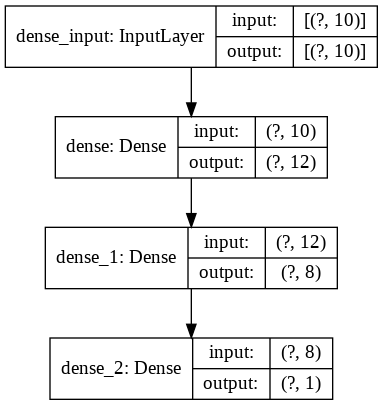

In [ ]:
# Visualize Model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=150)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

162/162 [==============================] - 0s 704us/step - loss: 0.6764 - accuracy: 0.5304
Accuracy: 53.04


In [ ]:
# Plot accuracy
accuracy = history.history["accuracy"][2:]
plt.plot(accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

loss = history.history["loss"][2:]
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Save model
model.save('model.h5')